# <font color='red'> LESSON 2: Datamart Building </font>
Data processing is the core of modelling process. 
For better understanding it is best to start at begining: <b>How does Python actually compute things in the code</b>?

## <font color='red'> Datamart </font>
Example of Data Marts Use Cases: 
* Marketing analysis and reporting favor a data mart approach because these activities are typically performed in a specialized business unit, and do not require enterprise-wide data.
* A financial analyst can use a finance data mart to carry out financial reporting.

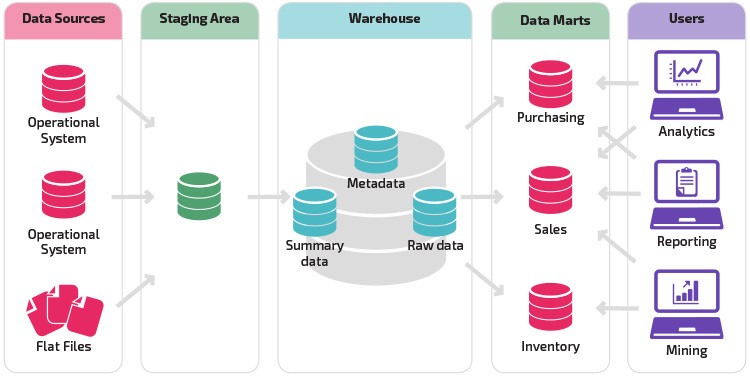 


### Data Processing flow = pipeline

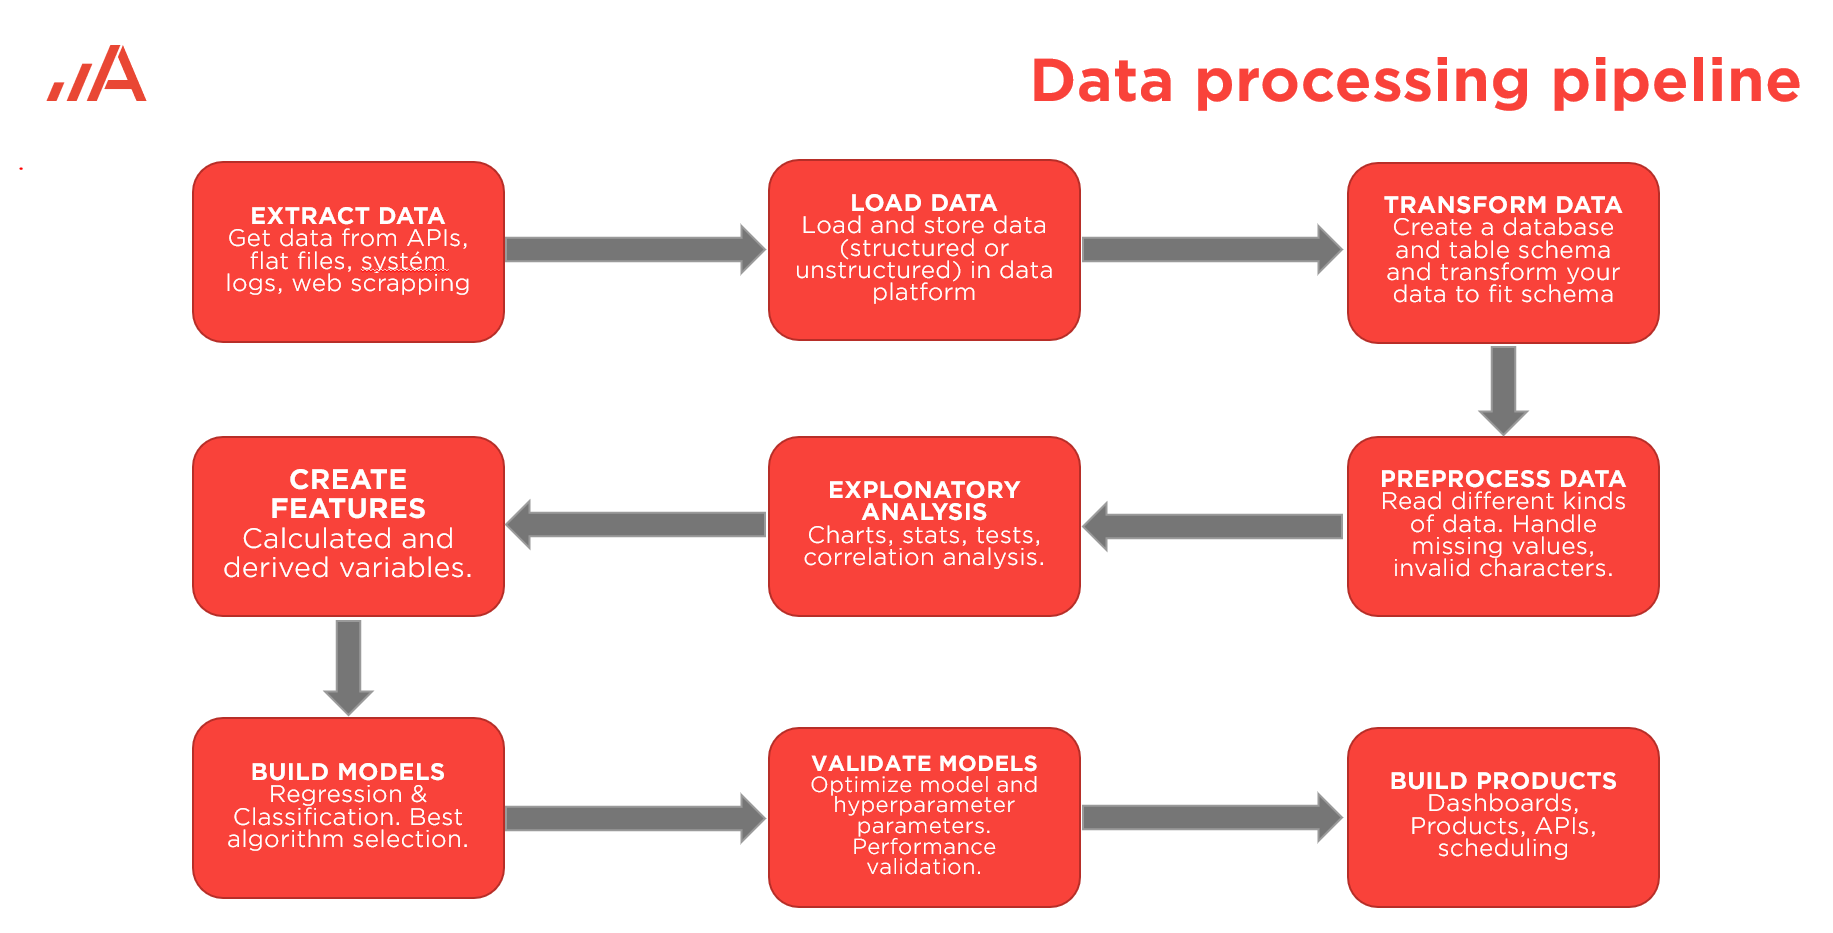 


### Analytical table

* do jedné analytické tabulky se spojí datové záznamy z různých tabulek
* na jedno místo se sehrají různé datové informace o jednom zákazníkovi/hráči.

==>>> <font color='blue'> **PLOCHÁ DENORMALIZOVANÁ TABULKA** </font>


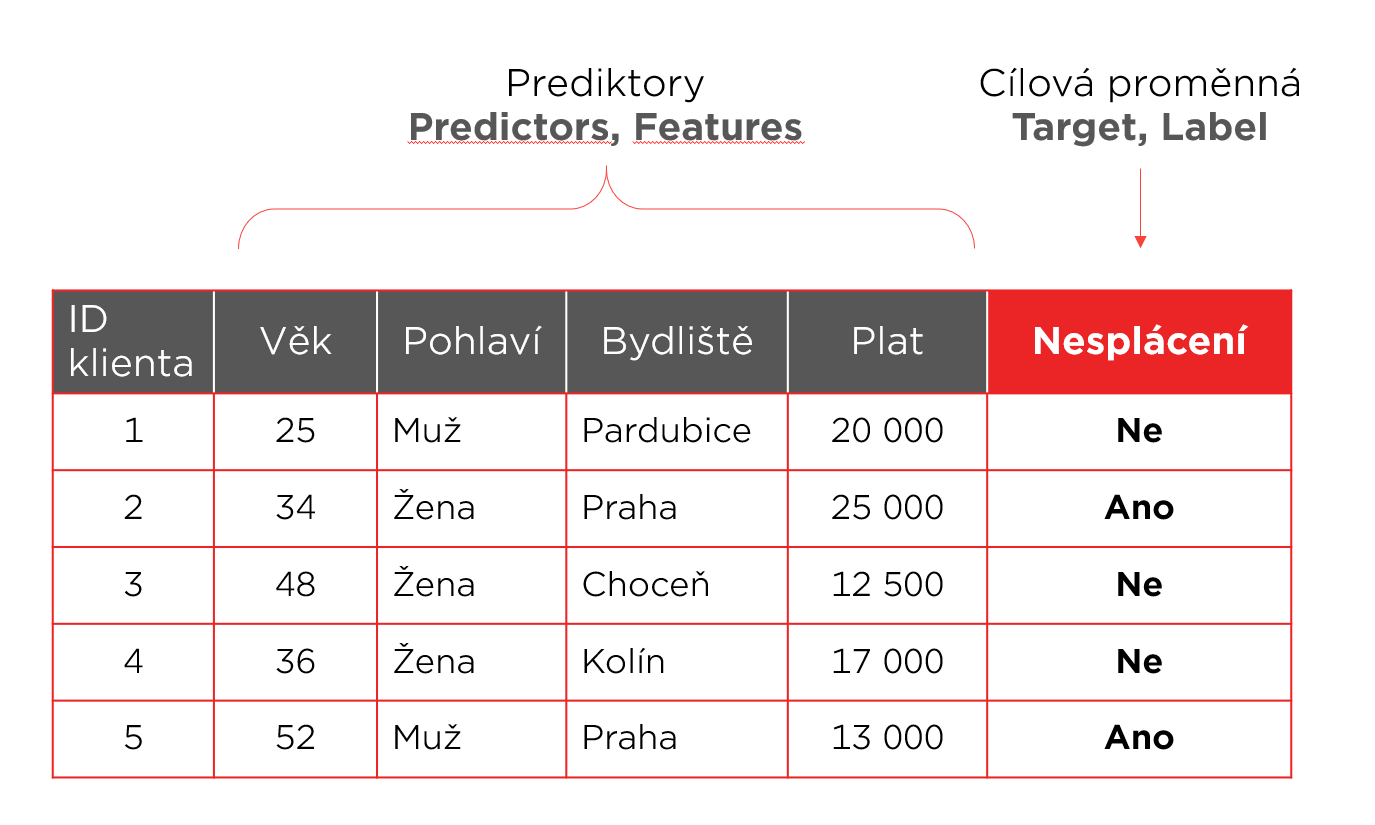 

### Analytical table - Changes in time
Working with time resolution is important mainly for predictive modeling. 

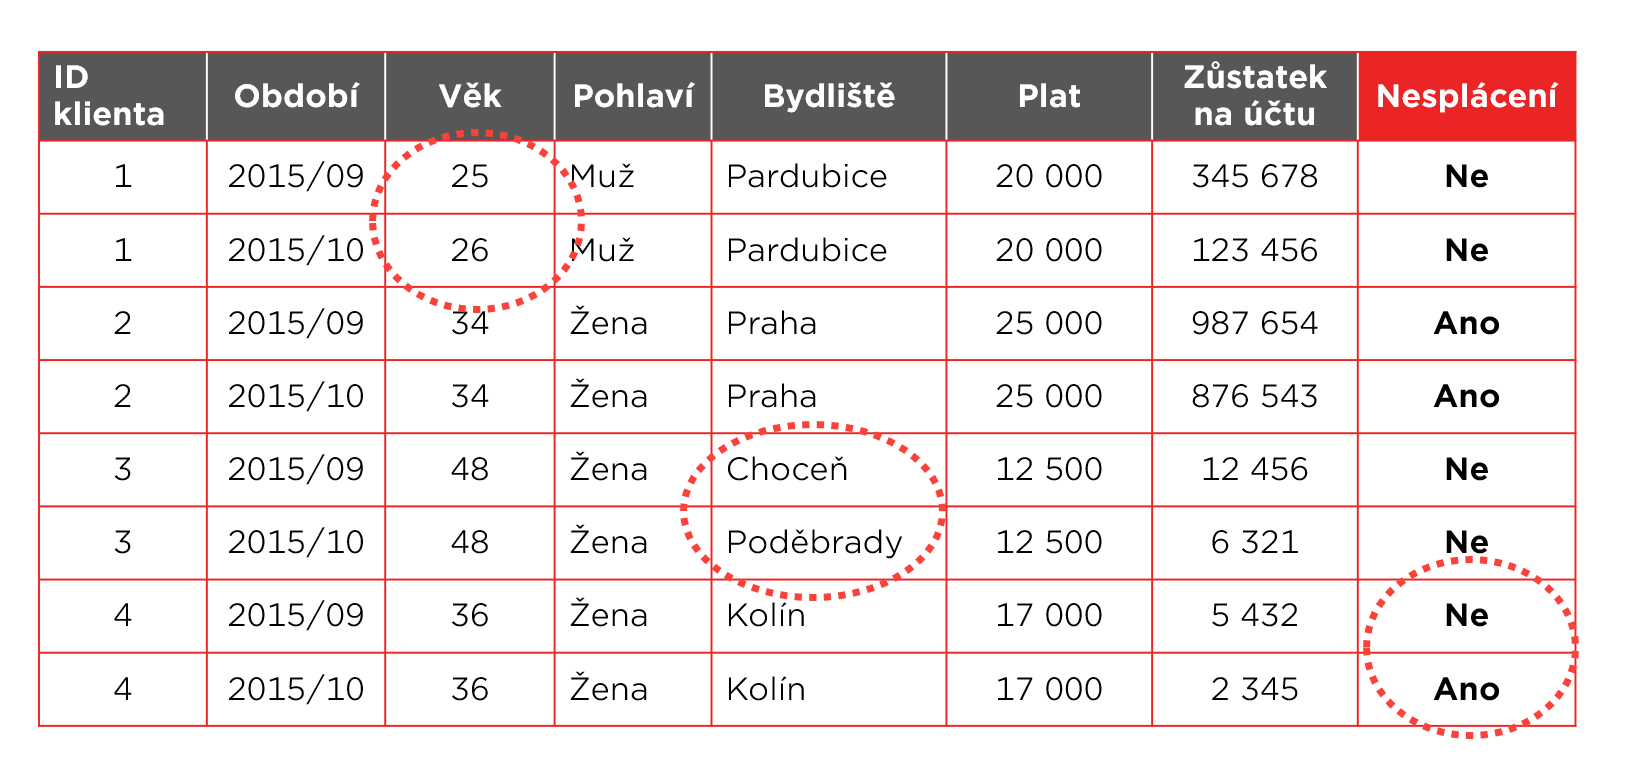


### Analytical table - same variable vs. two snapshots

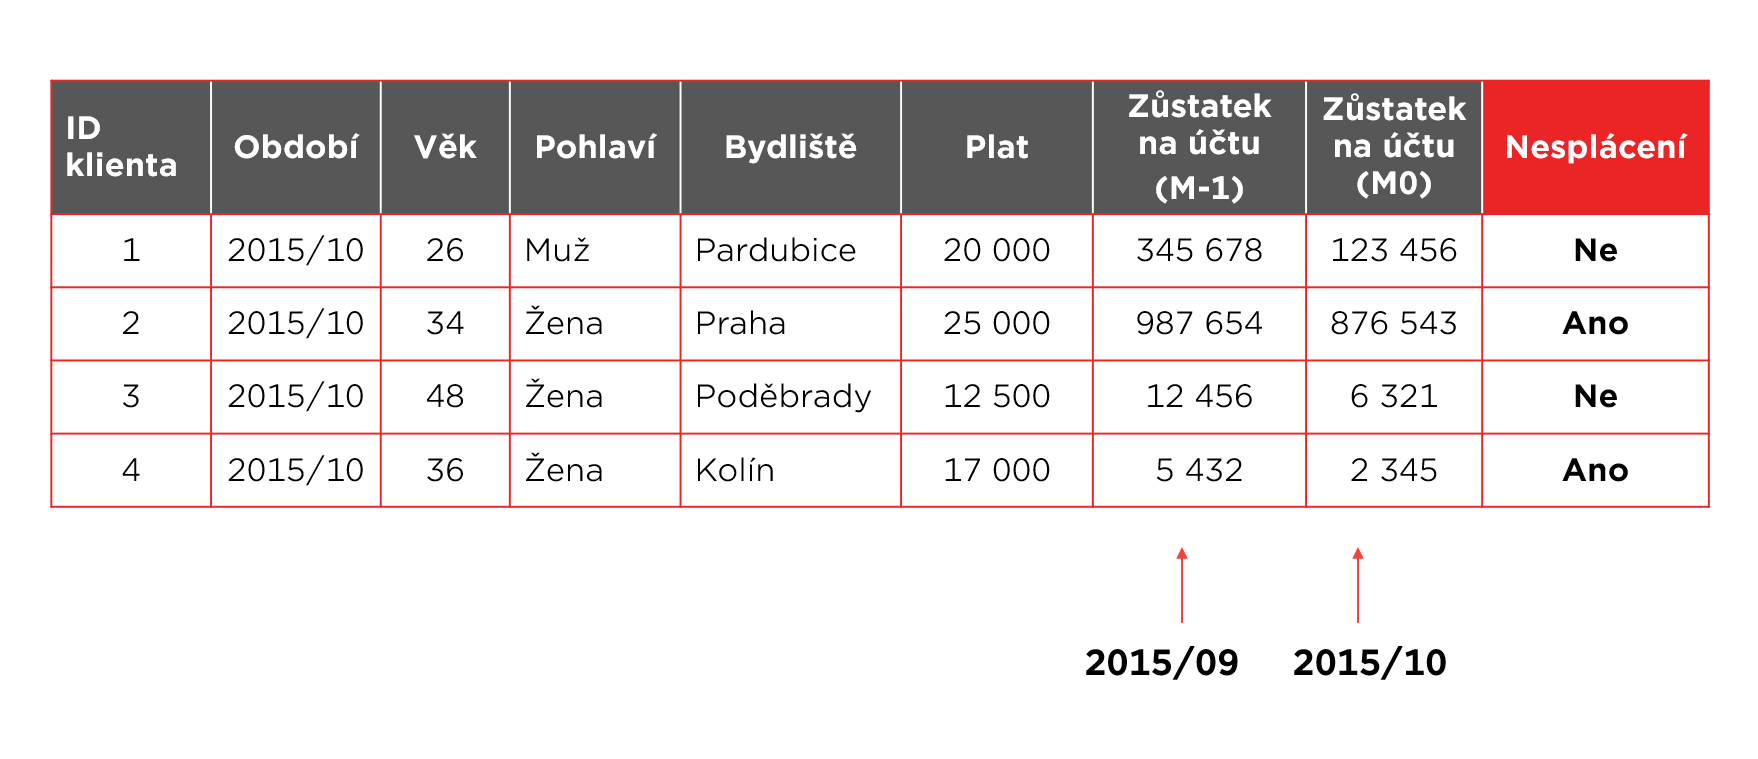 

### Analytical table - calculated indicators 

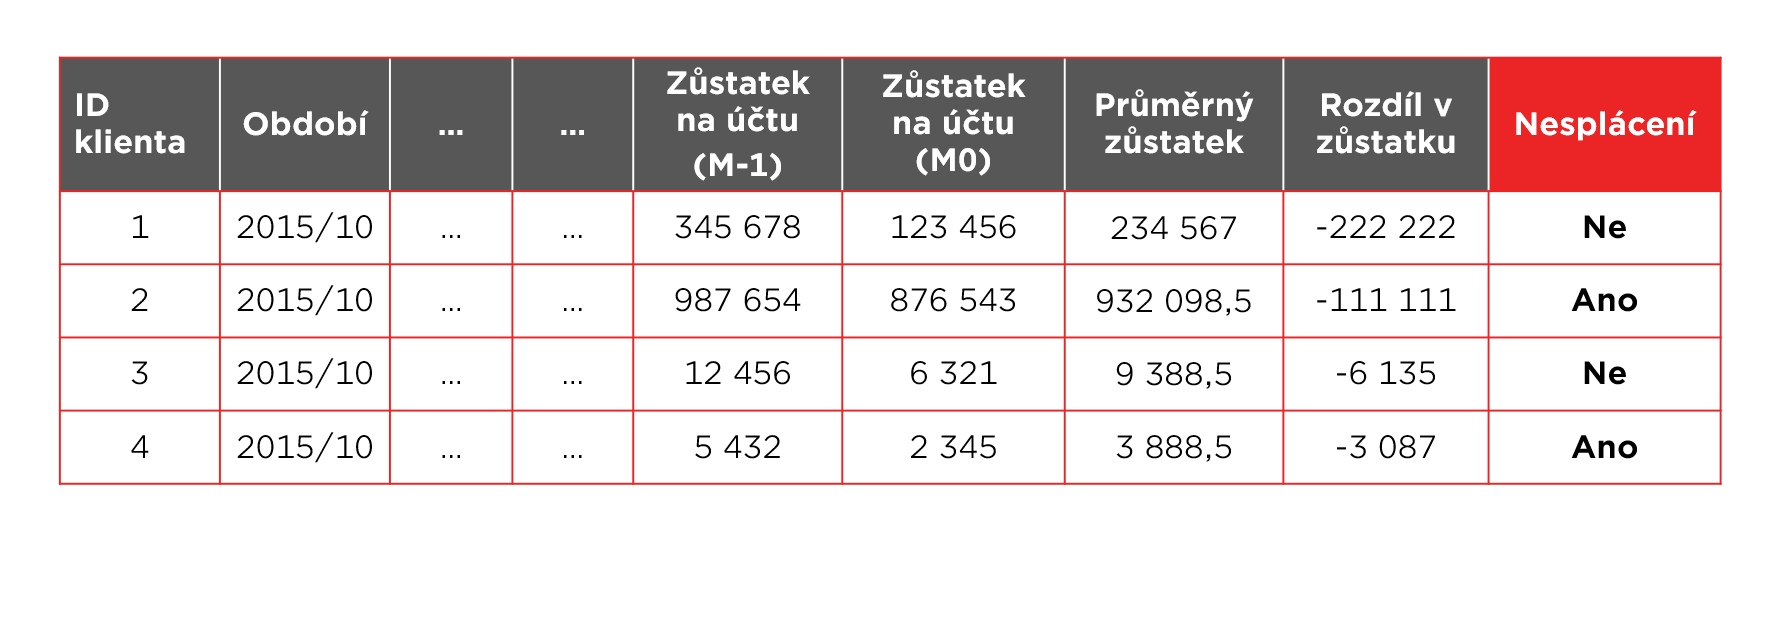 

## <font color='red'> Data preparation </font>

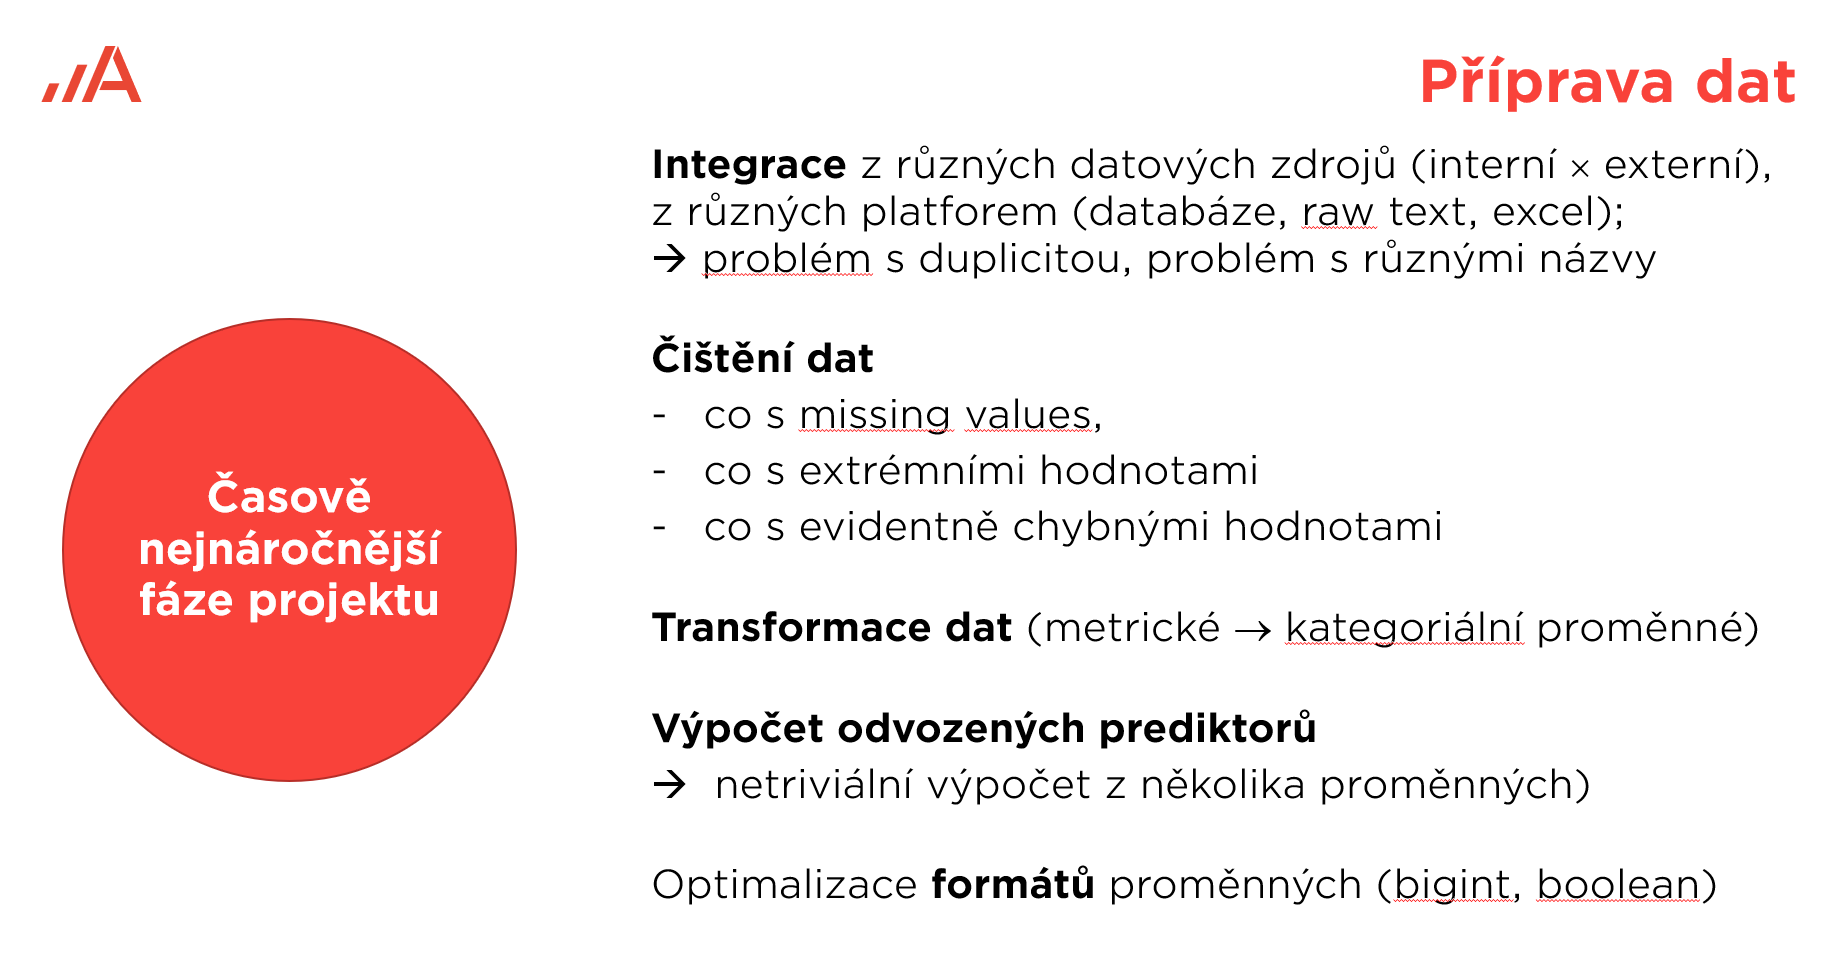


### Household price dataset

Let't work with our dataset. 

In [1]:
import sys

sys.version

'3.8.8 | packaged by conda-forge | (default, Feb 20 2021, 16:22:27) \n[GCC 9.3.0]'

Importing raw data and processed dataset from last lesson

In [2]:
import pandas as pd

raw_data = pd.read_csv('./data/train.csv')
data = pd.read_parquet('./data/processed_data.parquet')

print("This Household Price dataset is consist of",len(data),"rows.")
print("This Household Price dataset is consist of",len(data.columns),"columns.") 

This Household Price dataset is consist of 1460 rows.
This Household Price dataset is consist of 83 columns.


### First look 
Let's display our data. 

In [3]:
display(data)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave  None      Reg   
1        2          20       RL         80.0     9600   Pave  None      Reg   
2        3          60       RL         68.0    11250   Pave  None      IR1   
3        4          70       RL         60.0     9550   Pave  None      IR1   
4        5          60       RL         84.0    14260   Pave  None      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave  None      Reg   
1456  1457          20       RL         85.0    13175   Pave  None      Reg   
1457  1458          70       RL         66.0     9042   Pave  None      Reg   
1458  1459          20       RL         68.0     9717   Pave  None      Reg   
1459  1460          20       RL         75.0     9937   Pave  None      Reg   

     LandContour Utilities  ...  Fence MiscFeature MiscVal MoSold YrSold  \
0            Lvl    AllPub  ...   None        None       0      2   2008   
1            Lvl    AllPub  ...   None        None       0      5   2007   
2            Lvl    AllPub  ...   None        None       0      9   2008   
3            Lvl    AllPub  ...   None        None       0      2   2006   
4            Lvl    AllPub  ...   None        None       0     12   2008   
...          ...       ...  ...    ...         ...     ...    ...    ...   
1455         Lvl    AllPub  ...   None        None       0      8   2007   
1456         Lvl    AllPub  ...  MnPrv        None       0      2   2010   
1457         Lvl    AllPub  ...  GdPrv        Shed    2500      5   2010   
1458         Lvl    AllPub  ...   None        None       0      4   2010   
1459         Lvl    AllPub  ...   None        None       0      6   2008   

     SaleType SaleCondition  SalePrice  Neighbourhood_Rank  PriceNtile  
0          WD        Normal     208500                  17           7  
1          WD        Normal     181500                  21           6  
2          WD        Normal     223500                  17           7  
3          WD       Abnorml     140000                  18           3  
4          WD        Normal     250000                  25           8  
...       ...           ...        ...                 ...         ...  
1455       WD        Normal     175000                  15           5  
1456       WD        Normal     210000                  14           7  
1457       WD        Normal     266500                  18           8  
1458       WD        Normal     142125                  11           3  
1459       WD        Normal     147500                   5           4  

[1460 rows x 83 columns]

### ID as a Index
Set ID as index and thus get rid of it from column list. 

In [4]:
data = data.set_index('Id')
display(data)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1             60       RL         65.0     8450   Pave  None      Reg   
2             20       RL         80.0     9600   Pave  None      Reg   
3             60       RL         68.0    11250   Pave  None      IR1   
4             70       RL         60.0     9550   Pave  None      IR1   
5             60       RL         84.0    14260   Pave  None      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1456          60       RL         62.0     7917   Pave  None      Reg   
1457          20       RL         85.0    13175   Pave  None      Reg   
1458          70       RL         66.0     9042   Pave  None      Reg   
1459          20       RL         68.0     9717   Pave  None      Reg   
1460          20       RL         75.0     9937   Pave  None      Reg   

     LandContour Utilities LotConfig  ...  Fence MiscFeature MiscVal MoSold  \
Id                                    ...                                     
1            Lvl    AllPub    Inside  ...   None        None       0      2   
2            Lvl    AllPub       FR2  ...   None        None       0      5   
3            Lvl    AllPub    Inside  ...   None        None       0      9   
4            Lvl    AllPub    Corner  ...   None        None       0      2   
5            Lvl    AllPub       FR2  ...   None        None       0     12   
...          ...       ...       ...  ...    ...         ...     ...    ...   
1456         Lvl    AllPub    Inside  ...   None        None       0      8   
1457         Lvl    AllPub    Inside  ...  MnPrv        None       0      2   
1458         Lvl    AllPub    Inside  ...  GdPrv        Shed    2500      5   
1459         Lvl    AllPub    Inside  ...   None        None       0      4   
1460         Lvl    AllPub    Inside  ...   None        None       0      6   

     YrSold SaleType  SaleCondition  SalePrice  Neighbourhood_Rank  PriceNtile  
Id                                                                              
1      2008       WD         Normal     208500                  17           7  
2      2007       WD         Normal     181500                  21           6  
3      2008       WD         Normal     223500                  17           7  
4      2006       WD        Abnorml     140000                  18           3  
5      2008       WD         Normal     250000                  25           8  
...     ...      ...            ...        ...                 ...         ...  
1456   2007       WD         Normal     175000                  15           5  
1457   2010       WD         Normal     210000                  14           7  
1458   2010       WD         Normal     266500                  18           8  
1459   2010       WD         Normal     142125                  11           3  
1460   2008       WD         Normal     147500                   5           4  

[1460 rows x 82 columns]

In [5]:
print("This Household Price dataset is consist of",len(data.columns),"columns.") 

This Household Price dataset is consist of 82 columns.


## <font color='red'> Classifying Data </font>

There are two classes of data, *qualitative* and *quantitative*. 

<font color='blue'> Qualitative data </font> use descriptive terms to differentiate values.
For example, gender is generally classified into "M" or male and "F" or female. Qualitative data can be used for
segmentation or classification. 

<font color='blue'> Quantitative data </font> is characterized by numeric values. 
There are four types of quantitative data.

**Nominal data** is numeric data that represents categories or attributes. The numeric values for gender (1 & 2) would be
nominal data values. One important characteristic of nominal data is that it has no relative importance. For example,
even though male = 1 and female = 2, the relative value of being female is not twice the value or a higher value than that
of being male. For modeling purposes, a nominal variable with only two values would be coded with the values 0 and 1.
This will be discussed in more detail in chapter 4.

**Ordinal data** is numeric data that represents categories that have relative importance. They can be used to rank strength
or severity. For example, a list company assigns the values 1 through 5 to denote financial risk. The value 1,
characterized by no late payments, is considered low risk. The value 5, characterized by a bankruptcy, is considered high
risk. The values 2 through 4 are characterized by various previous delinquencies. A prospect with a risk ranking of 5 is
definitely riskier than a prospect with a ranking of 1. But he or she is not five times as risky. And the difference in their
ranks of 5 –1 = 4 has no meaning.

**Interval data** is numeric data that has relative importance and has no zero point. Also, addition and subtraction are
meaningful operations. For example, many financial institutions use a risk score that has a much finer definition than the
values 1 through 5, as in our previous example. A typical range is from 300 to 800. It is therefore possible to compare
scores by measuring the difference.

**Continuous data** is the most common data used to develop predictive models. It can accommodate all basic arithmetic
operations, including addition, subtraction, multiplication, and division. 
Most business data such as sales, balances, and minutes, is continuous data.

 
![feature types](https://cdn.shopify.com/s/files/1/1334/2321/articles/Picture1.png?v=1497575369)

## <font color='red'> Numeric vs. Categorical Features </font>



At the beginning, we have to be sure that we are able to distinguish between continuous and categorical features. 

The reason is simple. The work and processing both type of features are different!!!

  - **Continuous(numeric) feature**: Continuous variables are numeric variables that have an infinite number of values between any two values. A continuous variable can be numeric or date/time. *For example, the length of a part or the date and time a payment is received.*
  
  - **Categorical feature**: Categorical variables contain a finite number of categories or distinct groups. Categorical data might not have a logical order. *For example, categorical predictors include gender, material type, and payment method.*

In general, type of object is not satisfactory and always correct. 

### Work with Suspicion 

#### Example: Is variable *MSSubClass* numeric or categorical?

Get number of unique values

In [6]:
display(data['MSSubClass'].nunique())

15

Show distinct values

<AxesSubplot:xlabel='MSSubClass', ylabel='count'>

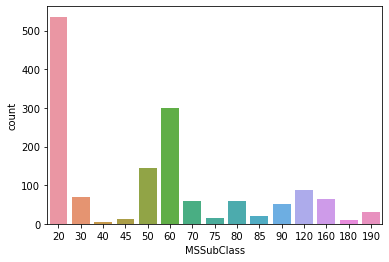

In [7]:
import seaborn as sns
sns.countplot(x=data['MSSubClass'],label="Count")

Count distinct values

In [8]:
display(data['MSSubClass'].value_counts())

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

**MSSubClass**:
    _Identifies the type of dwelling involved in the sale._
  - **20**: _1-STORY 1946 & NEWER ALL STYLES_
  - **30**: _1-STORY 1945 & OLDER_
  - **40**: _1-STORY W/FINISHED ATTIC ALL AGES_
  - **45**: _1-1/2 STORY - UNFINISHED ALL AGES_
  - **50**: _1-1/2 STORY FINISHED ALL AGES_
  - **60**: _2-STORY 1946 & NEWER_
  - **70**: _2-STORY 1945 & OLDER_
  - **75**: _2-1/2 STORY ALL AGES_
  - **80**: _SPLIT OR MULTI-LEVEL_
  - **85**: _SPLIT FOYER_
  - **90**: _DUPLEX - ALL STYLES AND AGES_
  - **120**: _1-STORY PUD (Planned Unit Development) - 1946 & NEWER_
  - **150**: _1-1/2 STORY PUD - ALL AGES_
  - **160**: _2-STORY PUD - 1946 & NEWER_
  - **180**: _PUD - MULTILEVEL - INCL SPLIT LEV/FOYER_
  - **190**: _2 FAMILY CONVERSION - ALL STYLES AND AGES_

#### Example: Is variable YearBuilt and GarageYrBlt numeric or categorical?

Show Years of House Building 

<AxesSubplot:xlabel='YearBuilt', ylabel='count'>

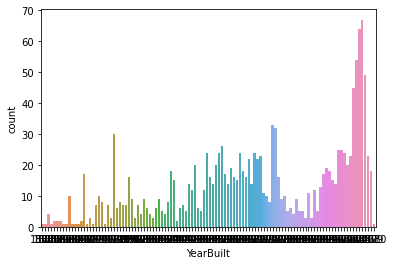

In [9]:
import seaborn as sns
sns.countplot(x=data['YearBuilt'],label="Count")

Show Years of Garage Building 

<AxesSubplot:xlabel='GarageYrBlt', ylabel='count'>

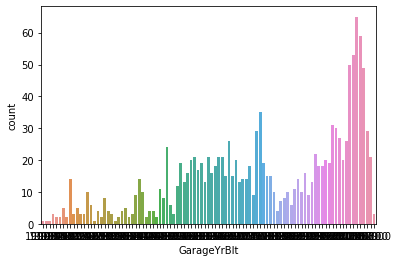

In [10]:
import seaborn as sns
sns.countplot(x=data['GarageYrBlt'],label="Count")

### Identifying date type of features


Numeric and categorical variables need to be separated. All categorical variables should be expressed as characters. Convert ordinal variables to character and group them with categorical variables.

Pandas dataframe ***info()*** method prints information about a dataframe including the data types and columns, non-null values and memory usage. It is important to keep in mind that not all variables of int/float type are neccessary numeric, but they can be also categorical (as in example above, variable *MSSubClass*).

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 82 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MSSubClass          1460 non-null   int64  
 1   MSZoning            1460 non-null   object 
 2   LotFrontage         1201 non-null   float64
 3   LotArea             1460 non-null   int64  
 4   Street              1460 non-null   object 
 5   Alley               91 non-null     object 
 6   LotShape            1460 non-null   object 
 7   LandContour         1460 non-null   object 
 8   Utilities           1460 non-null   object 
 9   LotConfig           1460 non-null   object 
 10  LandSlope           1460 non-null   object 
 11  Neighborhood        1460 non-null   object 
 12  Condition1          1460 non-null   object 
 13  Condition2          1460 non-null   object 
 14  BldgType            1460 non-null   object 
 15  HouseStyle          1460 non-null   object 
 16  Overal

### Automatically processed identification of categorical and numerical variables incl. removal of inappropriate columns

One way to decide whether the variable is categorical without need to check it manually one by one is to find the ratio of number of unique values to the total number of unique values. If the ratio is smaller than selected threshold, then the variable is most likely categorical.

In [12]:
data['LotArea'].isna().sum() / data['LotArea'].count()

0.0

In [13]:
from pandas.api.types import is_numeric_dtype

unique_count_ratio = 0.05
empty_ratio = 0.9
min_distinct_values = 2
columns = data.columns
# define label columns
label = 'SalePrice'
date_features = ['YearBuilt', 'GarageYrBlt']
# define empty list of categorical features which we will fill
cat_features = []
# define empty list of numerical features which we will fill
num_features = []

#consider feature categorical if ratio is below given value and number of unique records is >= 2
for var in columns:
    if \
      1.*data[var].nunique()/data[var].count() < unique_count_ratio \
      and data[var].nunique() >= min_distinct_values \
      and data[var].isna().sum() / data[var].count() < empty_ratio:
        cat_features.append(var)
    
#consider feature numerical if ratio is greater than or equal to given value and feature has numerival data type
for var in columns:
    if \
      1.*data[var].nunique()/data[var].count() >= unique_count_ratio \
      and is_numeric_dtype(data[var]) \
      and data[var].isna().sum() / data[var].count() < empty_ratio:
        num_features.append(var)
        
# remove data features from feature lists
#cat_features = [f for f in cat_features if f not in date_features ]
#num_features = [f for f in num_features if f not in date_features ]
leftover_features = [c for c in columns if c not in num_features + cat_features + date_features]
display(leftover_features)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

Based on the logic explained above:
* the variables in dictionary with value *True* are considered categorical
* the inappropriate variables are not in list anymore 

All categorical variables are converted to string

In [14]:
cat_data = data[cat_features].astype(str)
display(cat_features)
cat_data

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition',
 'Neighbourhood_Rank',
 'PriceNtile']

MSSubClass MSZoning Street LotShape LandContour Utilities LotConfig  \
Id                                                                         
1            60       RL   Pave      Reg         Lvl    AllPub    Inside   
2            20       RL   Pave      Reg         Lvl    AllPub       FR2   
3            60       RL   Pave      IR1         Lvl    AllPub    Inside   
4            70       RL   Pave      IR1         Lvl    AllPub    Corner   
5            60       RL   Pave      IR1         Lvl    AllPub       FR2   
...         ...      ...    ...      ...         ...       ...       ...   
1456         60       RL   Pave      Reg         Lvl    AllPub    Inside   
1457         20       RL   Pave      Reg         Lvl    AllPub    Inside   
1458         70       RL   Pave      Reg         Lvl    AllPub    Inside   
1459         20       RL   Pave      Reg         Lvl    AllPub    Inside   
1460         20       RL   Pave      Reg         Lvl    AllPub    Inside   

     LandSlope Neighborhood Condition1  ... PavedDrive 3SsnPorch PoolArea  \
Id                                      ...                                 
1          Gtl      CollgCr       Norm  ...          Y         0        0   
2          Gtl      Veenker      Feedr  ...          Y         0        0   
3          Gtl      CollgCr       Norm  ...          Y         0        0   
4          Gtl      Crawfor       Norm  ...          Y         0        0   
5          Gtl      NoRidge       Norm  ...          Y         0        0   
...        ...          ...        ...  ...        ...       ...      ...   
1456       Gtl      Gilbert       Norm  ...          Y         0        0   
1457       Gtl       NWAmes       Norm  ...          Y         0        0   
1458       Gtl      Crawfor       Norm  ...          Y         0        0   
1459       Gtl        NAmes       Norm  ...          Y         0        0   
1460       Gtl      Edwards       Norm  ...          Y         0        0   

     MiscVal MoSold YrSold SaleType SaleCondition Neighbourhood_Rank  \
Id                                                                     
1          0      2   2008       WD        Normal                 17   
2          0      5   2007       WD        Normal                 21   
3          0      9   2008       WD        Normal                 17   
4          0      2   2006       WD       Abnorml                 18   
5          0     12   2008       WD        Normal                 25   
...      ...    ...    ...      ...           ...                ...   
1456       0      8   2007       WD        Normal                 15   
1457       0      2   2010       WD        Normal                 14   
1458    2500      5   2010       WD        Normal                 18   
1459       0      4   2010       WD        Normal                 11   
1460       0      6   2008       WD        Normal                  5   

     PriceNtile  
Id               
1             7  
2             6  
3             7  
4             3  
5             8  
...         ...  
1456          5  
1457          7  
1458          8  
1459          3  
1460          4  

[1460 rows x 60 columns]

#### Number of categorical variables

In [15]:
cat_data.dtypes.value_counts()

object    60
dtype: int64

### Identifying numeric features

The variables which are not in list of categorical features are considered as numeric. All numeric variables are converted to float

In [16]:
num_data = data[num_features].astype(float)
display(num_data)
num_data.dtypes.value_counts()

LotFrontage  LotArea  YearBuilt  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
Id                                                                          
1            65.0   8450.0     2003.0       196.0       706.0         0.0   
2            80.0   9600.0     1976.0         0.0       978.0         0.0   
3            68.0  11250.0     2001.0       162.0       486.0         0.0   
4            60.0   9550.0     1915.0         0.0       216.0         0.0   
5            84.0  14260.0     2000.0       350.0       655.0         0.0   
...           ...      ...        ...         ...         ...         ...   
1456         62.0   7917.0     1999.0         0.0         0.0         0.0   
1457         85.0  13175.0     1978.0       119.0       790.0       163.0   
1458         66.0   9042.0     1941.0         0.0       275.0         0.0   
1459         68.0   9717.0     1950.0         0.0        49.0      1029.0   
1460         75.0   9937.0     1965.0         0.0       830.0       290.0   

      BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageYrBlt  \
Id                                                                         
1         150.0        856.0     856.0     854.0     1710.0       2003.0   
2         284.0       1262.0    1262.0       0.0     1262.0       1976.0   
3         434.0        920.0     920.0     866.0     1786.0       2001.0   
4         540.0        756.0     961.0     756.0     1717.0       1998.0   
5         490.0       1145.0    1145.0    1053.0     2198.0       2000.0   
...         ...          ...       ...       ...        ...          ...   
1456      953.0        953.0     953.0     694.0     1647.0       1999.0   
1457      589.0       1542.0    2073.0       0.0     2073.0       1978.0   
1458      877.0       1152.0    1188.0    1152.0     2340.0       1941.0   
1459        0.0       1078.0    1078.0       0.0     1078.0       1950.0   
1460      136.0       1256.0    1256.0       0.0     1256.0       1965.0   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  \
Id                                                                      
1          548.0         0.0         61.0            0.0          0.0   
2          460.0       298.0          0.0            0.0          0.0   
3          608.0         0.0         42.0            0.0          0.0   
4          642.0         0.0         35.0          272.0          0.0   
5          836.0       192.0         84.0            0.0          0.0   
...          ...         ...          ...            ...          ...   
1456       460.0         0.0         40.0            0.0          0.0   
1457       500.0       349.0          0.0            0.0          0.0   
1458       252.0         0.0         60.0            0.0          0.0   
1459       240.0       366.0          0.0          112.0          0.0   
1460       276.0       736.0         68.0            0.0          0.0   

      SalePrice  
Id               
1      208500.0  
2      181500.0  
3      223500.0  
4      140000.0  
5      250000.0  
...         ...  
1456   175000.0  
1457   210000.0  
1458   266500.0  
1459   142125.0  
1460   147500.0  

[1460 rows x 18 columns]

float64    18
dtype: int64

## <font color='red'> Transformation of Numeric Features </font>

The next step is to examine the data for errors, outliers, and missing values. This is the most time-consuming, least exciting, and most important step in the data preparation process. Luckily
there are some effective techniques for managing this process.
First, let's describe some techniques for cleaning and repairing data for continuous variables. 

### Aggregations: Min, Max, and Everything in Between



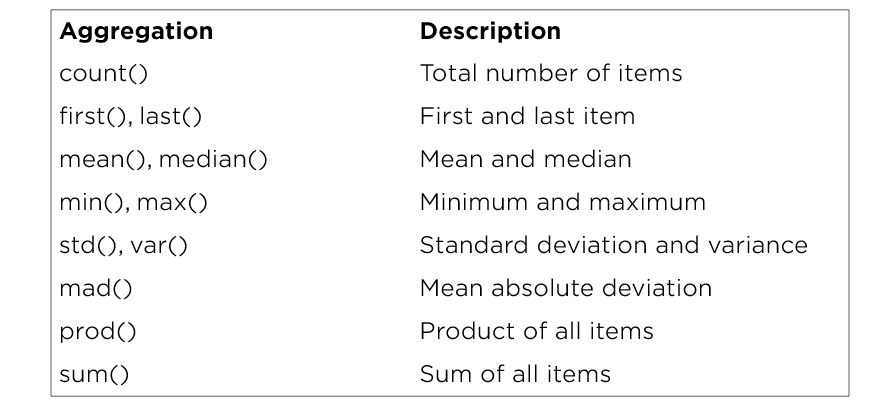


In [17]:
num_data.describe()

LotFrontage        LotArea    YearBuilt   MasVnrArea   BsmtFinSF1  \
count  1201.000000    1460.000000  1460.000000  1452.000000  1460.000000   
mean     70.049958   10516.828082  1971.267808   103.685262   443.639726   
std      24.284752    9981.264932    30.202904   181.066207   456.098091   
min      21.000000    1300.000000  1872.000000     0.000000     0.000000   
25%      59.000000    7553.500000  1954.000000     0.000000     0.000000   
50%      69.000000    9478.500000  1973.000000     0.000000   383.500000   
75%      80.000000   11601.500000  2000.000000   166.000000   712.250000   
max     313.000000  215245.000000  2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

         GrLivArea  GarageYrBlt   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000   
mean   1515.463699  1978.506164   472.980137    94.244521    46.660274   
std     525.480383    24.689725   213.804841   125.338794    66.256028   
min     334.000000  1900.000000     0.000000     0.000000     0.000000   
25%    1129.500000  1961.000000   334.500000     0.000000     0.000000   
50%    1464.000000  1980.000000   480.000000     0.000000    25.000000   
75%    1776.750000  2002.000000   576.000000   168.000000    68.000000   
max    5642.000000  2010.000000  1418.000000   857.000000   547.000000   

       EnclosedPorch  ScreenPorch      SalePrice  
count    1460.000000  1460.000000    1460.000000  
mean       21.954110    15.060959  180921.195890  
std        61.119149    55.757415   79442.502883  
min         0.000000     0.000000   34900.000000  
25%         0.000000     0.000000  129975.000000  
50%         0.000000     0.000000  163000.000000  
75%         0.000000     0.000000  214000.000000  
max       552.000000   480.000000  755000.000000

In [18]:
num_data.describe(percentiles=[0.01,0.25,0.5,0.75,0.99])

LotFrontage        LotArea    YearBuilt   MasVnrArea   BsmtFinSF1  \
count  1201.000000    1460.000000  1460.000000  1452.000000  1460.000000   
mean     70.049958   10516.828082  1971.267808   103.685262   443.639726   
std      24.284752    9981.264932    30.202904   181.066207   456.098091   
min      21.000000    1300.000000  1872.000000     0.000000     0.000000   
1%       21.000000    1680.000000  1899.180000     0.000000     0.000000   
25%      59.000000    7553.500000  1954.000000     0.000000     0.000000   
50%      69.000000    9478.500000  1973.000000     0.000000   383.500000   
75%      80.000000   11601.500000  2000.000000   166.000000   712.250000   
99%     141.000000   37567.640000  2009.000000   791.920000  1572.410000   
max     313.000000  215245.000000  2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
1%        0.000000     0.000000     0.000000   520.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
99%     830.380000  1797.050000  2155.050000  2219.460000  1418.920000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

         GrLivArea  GarageYrBlt   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000   
mean   1515.463699  1978.506164   472.980137    94.244521    46.660274   
std     525.480383    24.689725   213.804841   125.338794    66.256028   
min     334.000000  1900.000000     0.000000     0.000000     0.000000   
1%      692.180000  1916.000000     0.000000     0.000000     0.000000   
25%    1129.500000  1961.000000   334.500000     0.000000     0.000000   
50%    1464.000000  1980.000000   480.000000     0.000000    25.000000   
75%    1776.750000  2002.000000   576.000000   168.000000    68.000000   
99%    3123.480000  2009.000000  1002.790000   505.460000   285.820000   
max    5642.000000  2010.000000  1418.000000   857.000000   547.000000   

       EnclosedPorch  ScreenPorch      SalePrice  
count    1460.000000  1460.000000    1460.000000  
mean       21.954110    15.060959  180921.195890  
std        61.119149    55.757415   79442.502883  
min         0.000000     0.000000   34900.000000  
1%          0.000000     0.000000   61815.970000  
25%         0.000000     0.000000  129975.000000  
50%         0.000000     0.000000  163000.000000  
75%         0.000000     0.000000  214000.000000  
99%       261.050000   268.050000  442567.010000  
max       552.000000   480.000000  755000.000000

In [19]:
num_data[num_data['LotArea'] > 200000]

LotFrontage   LotArea  YearBuilt  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
Id                                                                          
314        150.0  215245.0     1965.0         0.0      1236.0       820.0   

     BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageYrBlt  \
Id                                                                        
314       80.0       2136.0    2036.0       0.0     2036.0       1965.0   

     GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  \
Id                                                                     
314       513.0         0.0          0.0            0.0          0.0   

     SalePrice  
Id              
314   375000.0

**LotFrontage**: Linear feet of street connected to property

**GarageYrBlt**: Year garage was built

### Missing values and null values handling
Missing data in general represent the values as null, NaN, or NA values. 
In Pandas, any missing values are filled in with NaN “Not a Number,” by default. 


Pandas data structures have two useful methods for detecting null data: **isnull()** and **notnull()**.
Either one will return a Boolean mask over the data. 
The isnull() and notnull() methods produce similar Boolean results for DataFrames.

In addition to the masking used before, there are the convenience methods: 

**fillna()** which fills in NA values. 

**dropna()** which removes NA values and 
Parameters:
  * **axis{0 or ‘index’, 1 or ‘columns’}, default 0**
    * Determine if rows or columns which contain missing values are removed.
    * **0**, or ‘index’ : Drop rows which contain missing values.
    * **1**, or ‘columns’ : Drop columns which contain missing value.
  * **how{‘any’, ‘all’}, default ‘any’**
    * Determine if row or column is removed from DataFrame, when we have at least one NA or all NA.
    * **'any'** : If any NA values are present, drop that row or column.
    * **'all'** : If all values are NA, drop that row or column.

In [20]:
num_data.dropna(axis=1, how='all', inplace=True)

### Value Imputer
Imputer is transformer for filling out missing numerical values using mean or median.

**Example**: Let's say we have some houses without information. We can decide (in reality not optimal) that we want to fill these rows with median.

In [21]:
import numpy as np
from sklearn.impute import SimpleImputer

median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
median_imputer.fit(num_data)
imp_data = pd.DataFrame(median_imputer.transform(num_data))
imp_data.columns = num_data.columns
imp_data.index = num_data.index

In [22]:
display(imp_data)

LotFrontage  LotArea  YearBuilt  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
Id                                                                          
1            65.0   8450.0     2003.0       196.0       706.0         0.0   
2            80.0   9600.0     1976.0         0.0       978.0         0.0   
3            68.0  11250.0     2001.0       162.0       486.0         0.0   
4            60.0   9550.0     1915.0         0.0       216.0         0.0   
5            84.0  14260.0     2000.0       350.0       655.0         0.0   
...           ...      ...        ...         ...         ...         ...   
1456         62.0   7917.0     1999.0         0.0         0.0         0.0   
1457         85.0  13175.0     1978.0       119.0       790.0       163.0   
1458         66.0   9042.0     1941.0         0.0       275.0         0.0   
1459         68.0   9717.0     1950.0         0.0        49.0      1029.0   
1460         75.0   9937.0     1965.0         0.0       830.0       290.0   

      BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageYrBlt  \
Id                                                                         
1         150.0        856.0     856.0     854.0     1710.0       2003.0   
2         284.0       1262.0    1262.0       0.0     1262.0       1976.0   
3         434.0        920.0     920.0     866.0     1786.0       2001.0   
4         540.0        756.0     961.0     756.0     1717.0       1998.0   
5         490.0       1145.0    1145.0    1053.0     2198.0       2000.0   
...         ...          ...       ...       ...        ...          ...   
1456      953.0        953.0     953.0     694.0     1647.0       1999.0   
1457      589.0       1542.0    2073.0       0.0     2073.0       1978.0   
1458      877.0       1152.0    1188.0    1152.0     2340.0       1941.0   
1459        0.0       1078.0    1078.0       0.0     1078.0       1950.0   
1460      136.0       1256.0    1256.0       0.0     1256.0       1965.0   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  \
Id                                                                      
1          548.0         0.0         61.0            0.0          0.0   
2          460.0       298.0          0.0            0.0          0.0   
3          608.0         0.0         42.0            0.0          0.0   
4          642.0         0.0         35.0          272.0          0.0   
5          836.0       192.0         84.0            0.0          0.0   
...          ...         ...          ...            ...          ...   
1456       460.0         0.0         40.0            0.0          0.0   
1457       500.0       349.0          0.0            0.0          0.0   
1458       252.0         0.0         60.0            0.0          0.0   
1459       240.0       366.0          0.0          112.0          0.0   
1460       276.0       736.0         68.0            0.0          0.0   

      SalePrice  
Id               
1      208500.0  
2      181500.0  
3      223500.0  
4      140000.0  
5      250000.0  
...         ...  
1456   175000.0  
1457   210000.0  
1458   266500.0  
1459   142125.0  
1460   147500.0  

[1460 rows x 18 columns]

### Outliers and Data Errors

An outlier is a single or low-frequency occurrence of the value of a variable that is far from the mean as well as the majority of the other values for that variable. Determining whether a value is an outlier or a data error is an art as well as a science. Having an intimate knowledge of your data is your best strength.

Common sense and good logic will lead you to most of the problems. In our example, the one value that seems questionable is the maximum value of **LotArea**.
Lot size in square feet is 215245. 


In [23]:
num_data.isna().sum()

LotFrontage      259
LotArea            0
YearBuilt          0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
GarageYrBlt       81
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
ScreenPorch        0
SalePrice          0
dtype: int64

#### InterQuartile Range calculation (IQR)  

We can calculate e.g. 0.75 percentile for LotArea indicator 

In [24]:
np.quantile(imp_data['LotArea'], 0.75)

11601.5

In [25]:
import numpy as np
# Removing the outliers
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
      
    print("IQR value for column {c} is: {i}".format(c=col, i=IQR))
      
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    
    if IQR != 0:
        data[col] = np.where(data[col] > upper_range, upper_range, data[col])
        data[col] = np.where(data[col] < lower_range, lower_range, data[col])   
    
iqr_data = imp_data.copy()

for i in iqr_data.columns:
    removeOutliers(iqr_data, i)
  
display(iqr_data)
display(iqr_data.dtypes)


IQR value for column LotFrontage is: 19.0
IQR value for column LotArea is: 4048.0
IQR value for column YearBuilt is: 46.0
IQR value for column MasVnrArea is: 164.25
IQR value for column BsmtFinSF1 is: 712.25
IQR value for column BsmtFinSF2 is: 0.0
IQR value for column BsmtUnfSF is: 585.0
IQR value for column TotalBsmtSF is: 502.5
IQR value for column 1stFlrSF is: 509.25
IQR value for column 2ndFlrSF is: 728.0
IQR value for column GrLivArea is: 647.25
IQR value for column GarageYrBlt is: 39.0
IQR value for column GarageArea is: 241.5
IQR value for column WoodDeckSF is: 168.0
IQR value for column OpenPorchSF is: 68.0
IQR value for column EnclosedPorch is: 0.0
IQR value for column ScreenPorch is: 0.0
IQR value for column SalePrice is: 84025.0


LotFrontage  LotArea  YearBuilt  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
Id                                                                          
1            65.0   8450.0     2003.0       196.0       706.0         0.0   
2            80.0   9600.0     1976.0         0.0       978.0         0.0   
3            68.0  11250.0     2001.0       162.0       486.0         0.0   
4            60.0   9550.0     1915.0         0.0       216.0         0.0   
5            84.0  14260.0     2000.0       350.0       655.0         0.0   
...           ...      ...        ...         ...         ...         ...   
1456         62.0   7917.0     1999.0         0.0         0.0         0.0   
1457         85.0  13175.0     1978.0       119.0       790.0       163.0   
1458         66.0   9042.0     1941.0         0.0       275.0         0.0   
1459         68.0   9717.0     1950.0         0.0        49.0      1029.0   
1460         75.0   9937.0     1965.0         0.0       830.0       290.0   

      BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageYrBlt  \
Id                                                                         
1         150.0        856.0     856.0     854.0     1710.0       2003.0   
2         284.0       1262.0    1262.0       0.0     1262.0       1976.0   
3         434.0        920.0     920.0     866.0     1786.0       2001.0   
4         540.0        756.0     961.0     756.0     1717.0       1998.0   
5         490.0       1145.0    1145.0    1053.0     2198.0       2000.0   
...         ...          ...       ...       ...        ...          ...   
1456      953.0        953.0     953.0     694.0     1647.0       1999.0   
1457      589.0       1542.0    2073.0       0.0     2073.0       1978.0   
1458      877.0       1152.0    1188.0    1152.0     2340.0       1941.0   
1459        0.0       1078.0    1078.0       0.0     1078.0       1950.0   
1460      136.0       1256.0    1256.0       0.0     1256.0       1965.0   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  \
Id                                                                      
1          548.0         0.0         61.0            0.0          0.0   
2          460.0       298.0          0.0            0.0          0.0   
3          608.0         0.0         42.0            0.0          0.0   
4          642.0         0.0         35.0          272.0          0.0   
5          836.0       192.0         84.0            0.0          0.0   
...          ...         ...          ...            ...          ...   
1456       460.0         0.0         40.0            0.0          0.0   
1457       500.0       349.0          0.0            0.0          0.0   
1458       252.0         0.0         60.0            0.0          0.0   
1459       240.0       366.0          0.0          112.0          0.0   
1460       276.0       420.0         68.0            0.0          0.0   

      SalePrice  
Id               
1      208500.0  
2      181500.0  
3      223500.0  
4      140000.0  
5      250000.0  
...         ...  
1456   175000.0  
1457   210000.0  
1458   266500.0  
1459   142125.0  
1460   147500.0  

[1460 rows x 18 columns]

LotFrontage      float64
LotArea          float64
YearBuilt        float64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF         float64
2ndFlrSF         float64
GrLivArea        float64
GarageYrBlt      float64
GarageArea       float64
WoodDeckSF       float64
OpenPorchSF      float64
EnclosedPorch    float64
ScreenPorch      float64
SalePrice        float64
dtype: object

<Figure size 432x288 with 0 Axes>

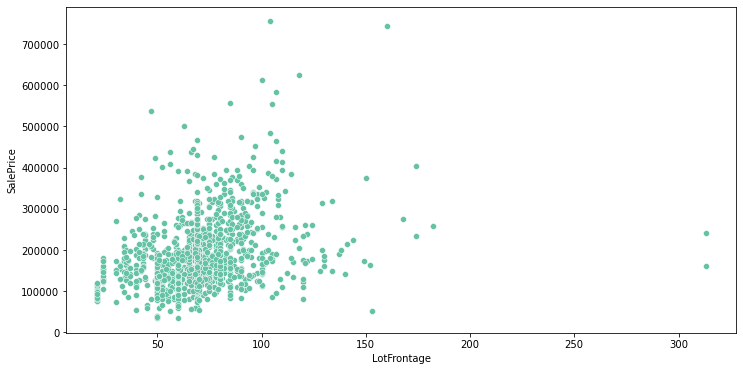

<Figure size 432x288 with 0 Axes>

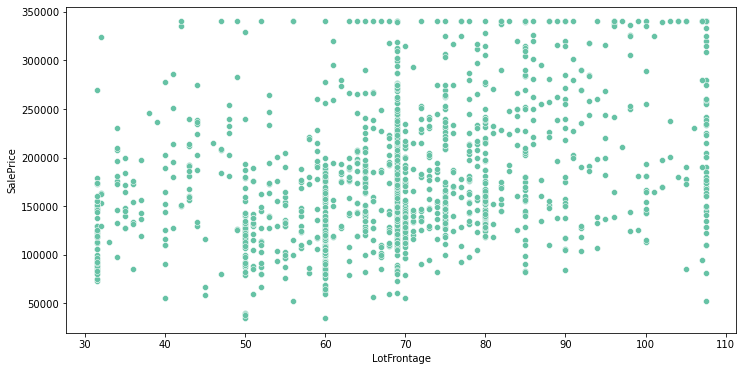

<Figure size 432x288 with 0 Axes>

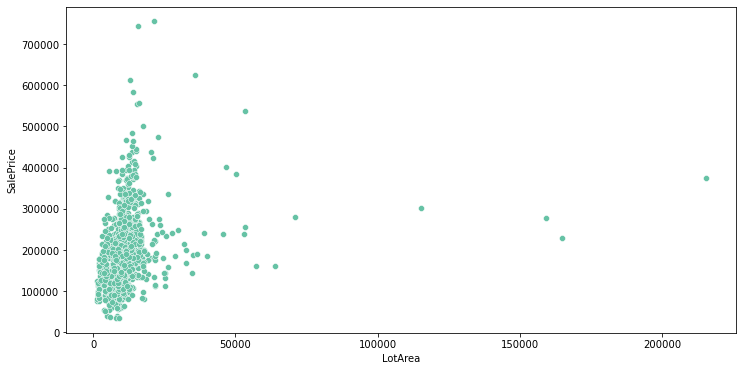

<Figure size 432x288 with 0 Axes>

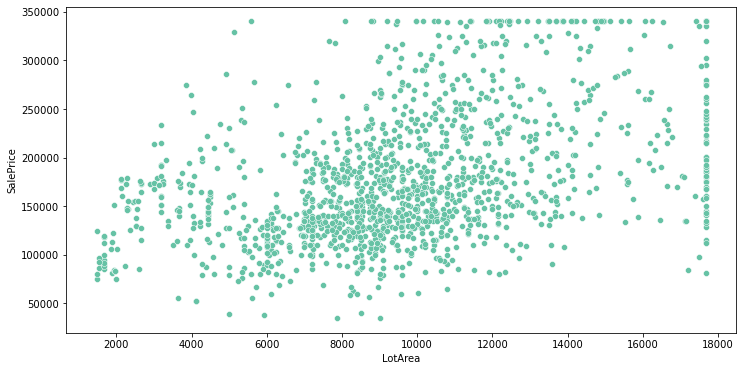

<Figure size 432x288 with 0 Axes>

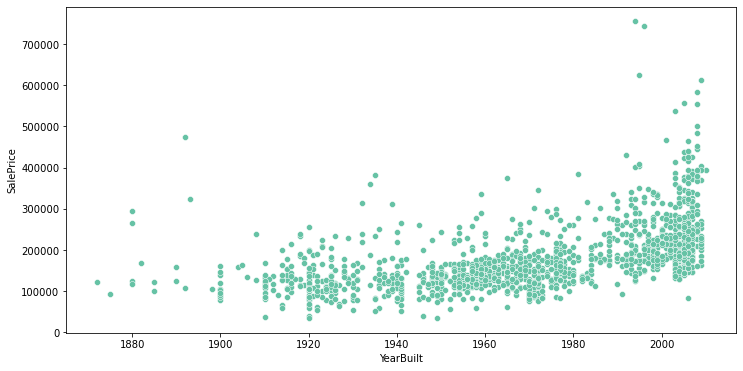

<Figure size 432x288 with 0 Axes>

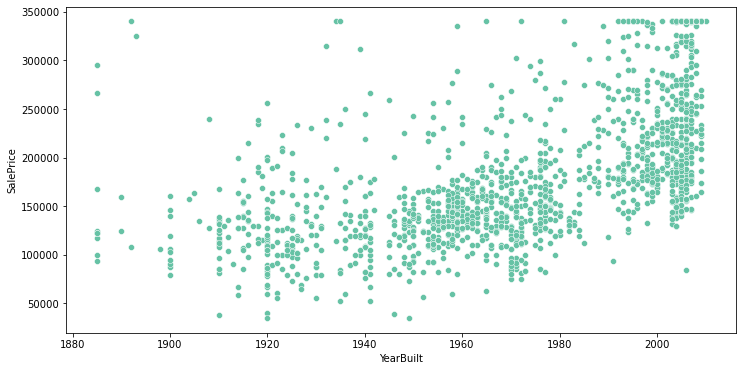

<Figure size 432x288 with 0 Axes>

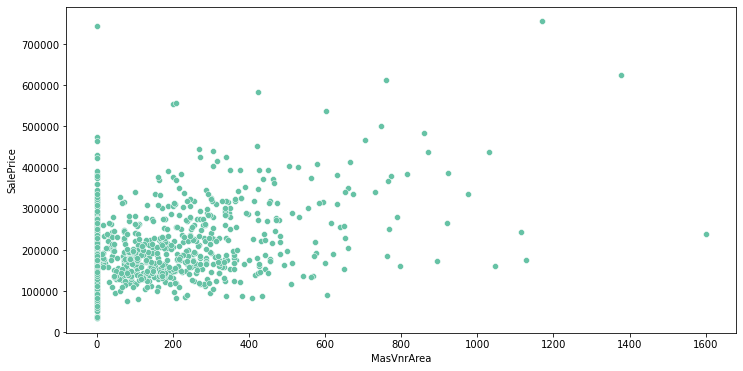

<Figure size 432x288 with 0 Axes>

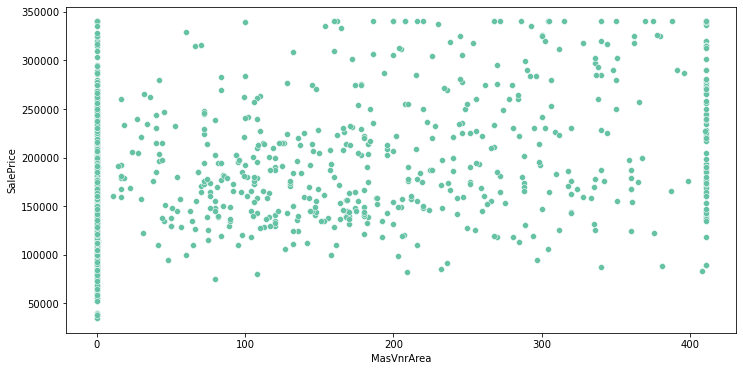

<Figure size 432x288 with 0 Axes>

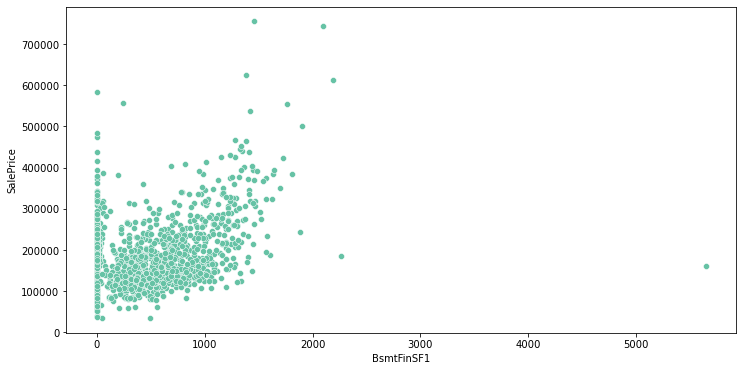

<Figure size 432x288 with 0 Axes>

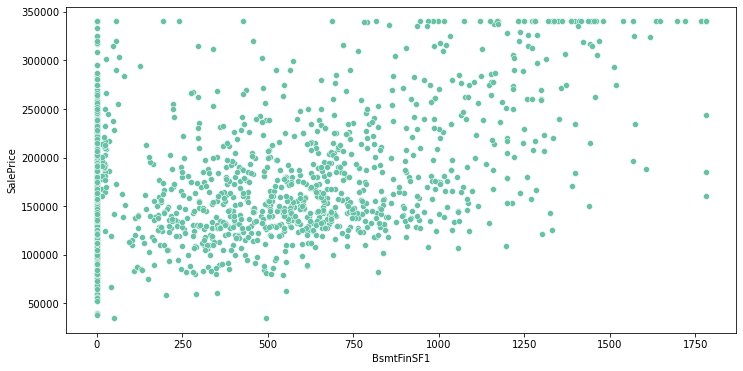

<Figure size 432x288 with 0 Axes>

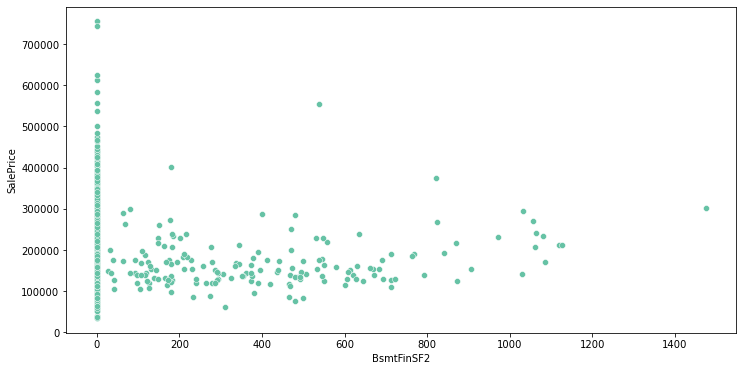

<Figure size 432x288 with 0 Axes>

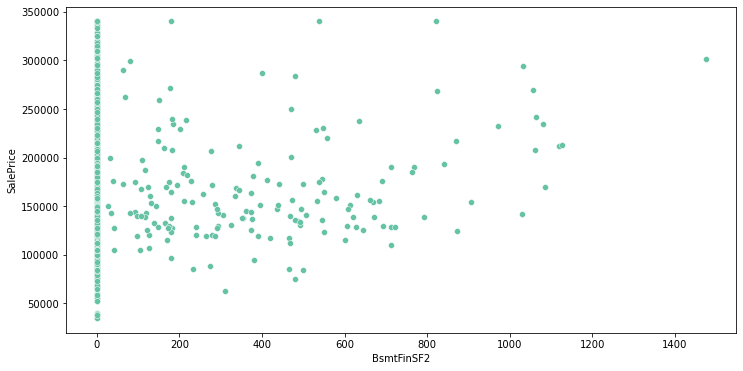

<Figure size 432x288 with 0 Axes>

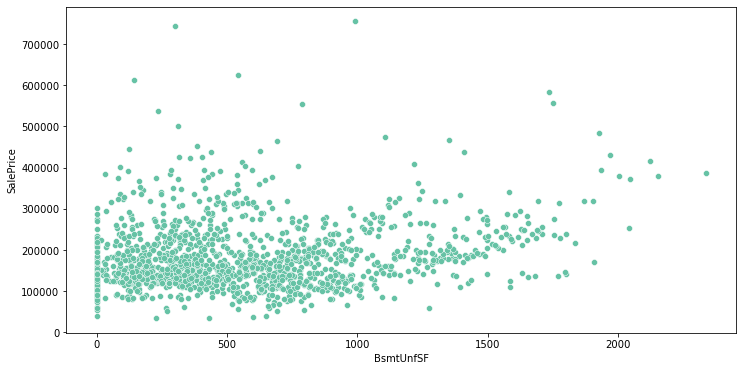

<Figure size 432x288 with 0 Axes>

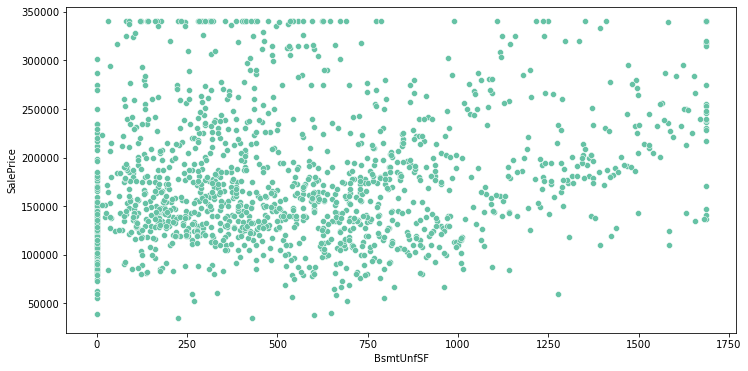

<Figure size 432x288 with 0 Axes>

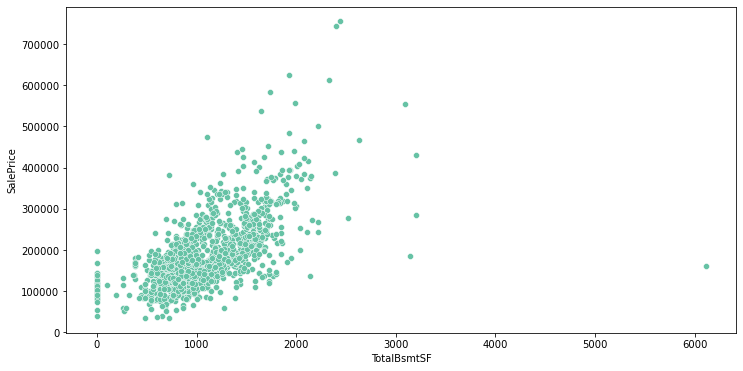

<Figure size 432x288 with 0 Axes>

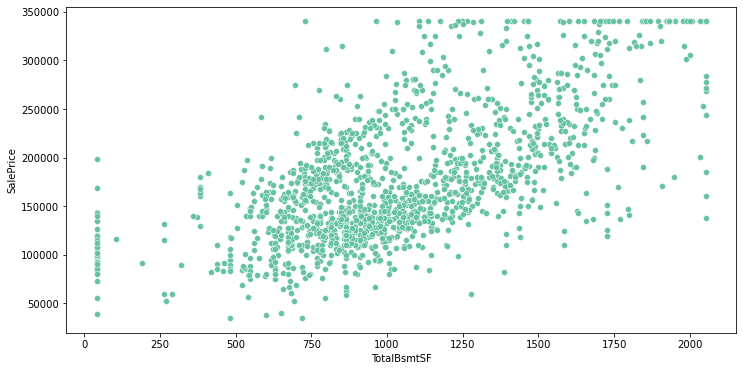

<Figure size 432x288 with 0 Axes>

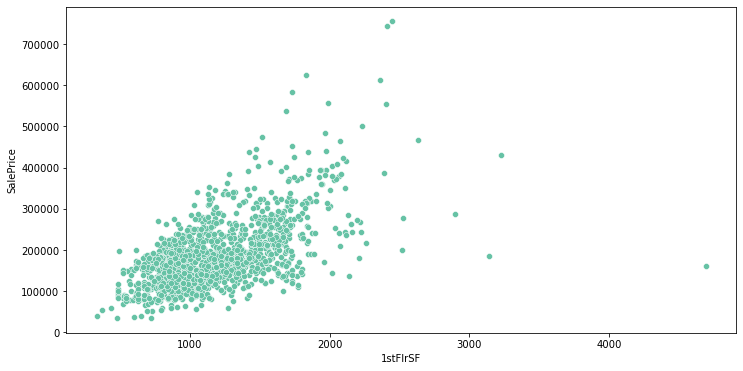

<Figure size 432x288 with 0 Axes>

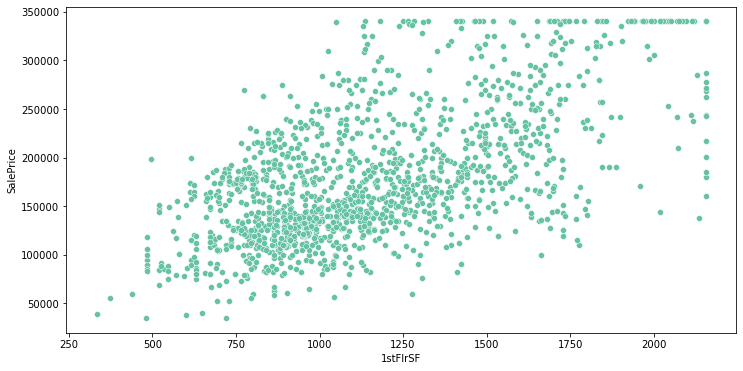

<Figure size 432x288 with 0 Axes>

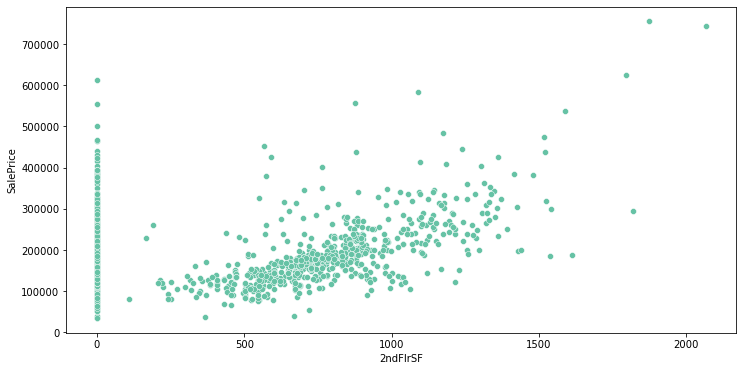

<Figure size 432x288 with 0 Axes>

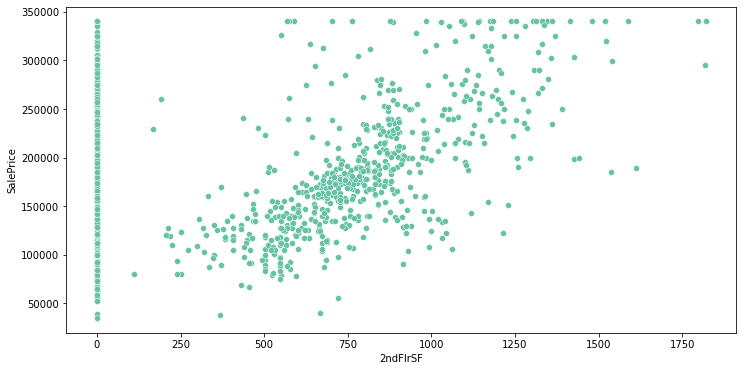

<Figure size 432x288 with 0 Axes>

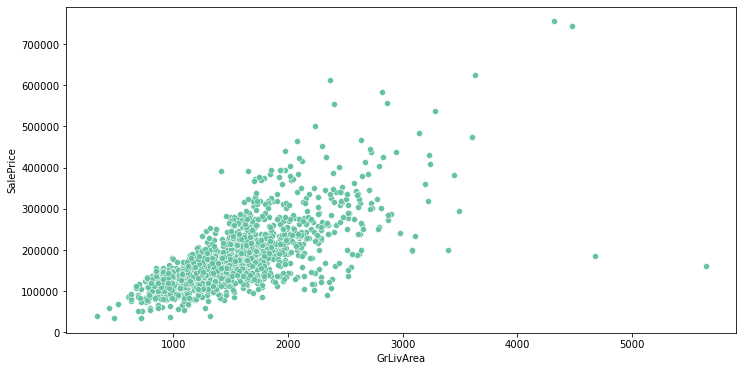

<Figure size 432x288 with 0 Axes>

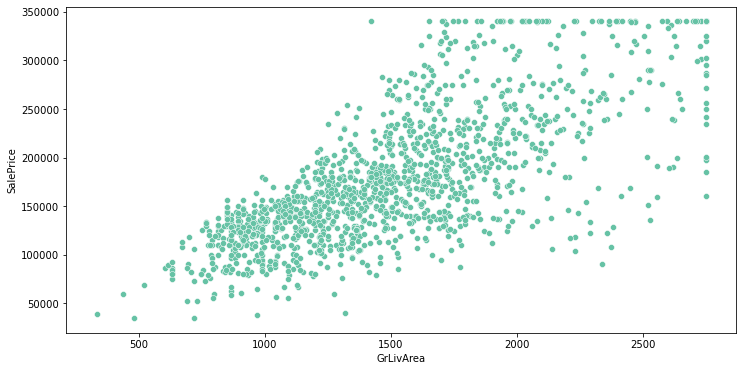

<Figure size 432x288 with 0 Axes>

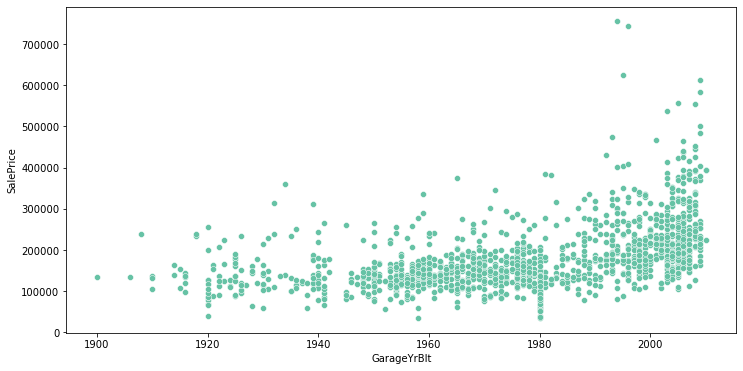

<Figure size 432x288 with 0 Axes>

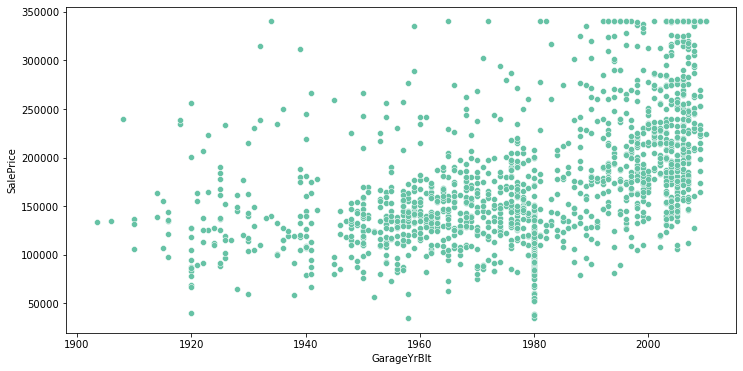

<Figure size 432x288 with 0 Axes>

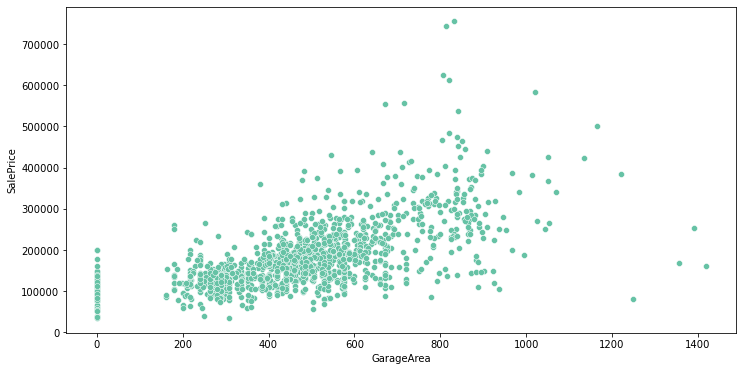

<Figure size 432x288 with 0 Axes>

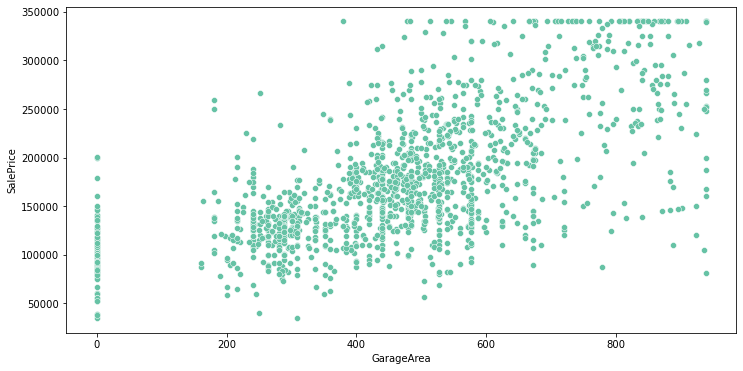

<Figure size 432x288 with 0 Axes>

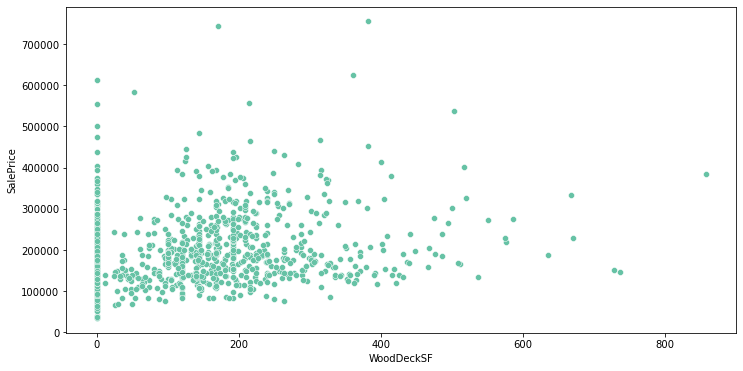

<Figure size 432x288 with 0 Axes>

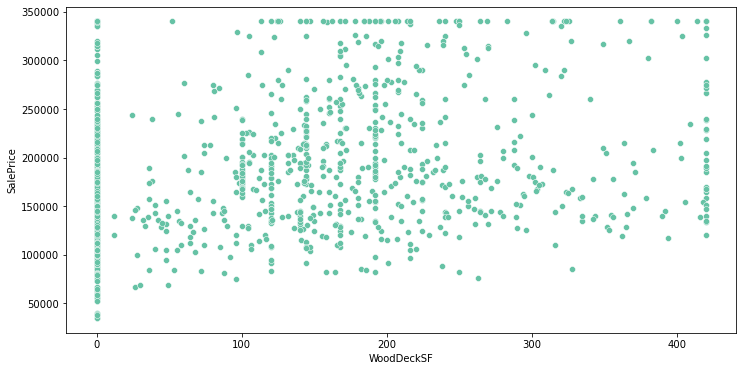

<Figure size 432x288 with 0 Axes>

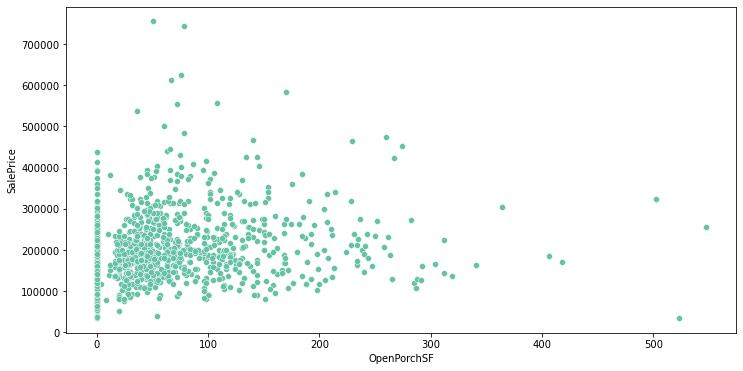

<Figure size 432x288 with 0 Axes>

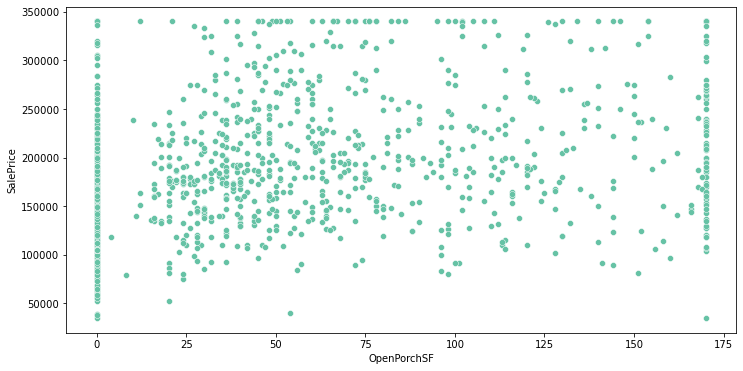

<Figure size 432x288 with 0 Axes>

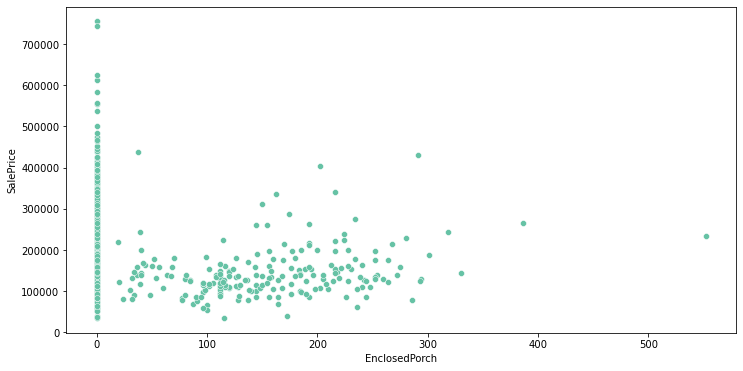

<Figure size 432x288 with 0 Axes>

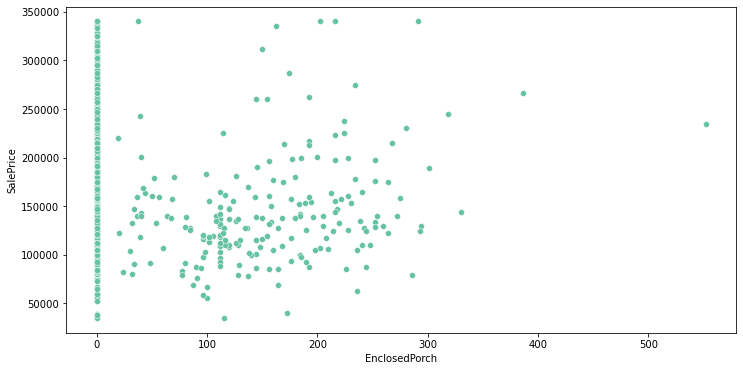

<Figure size 432x288 with 0 Axes>

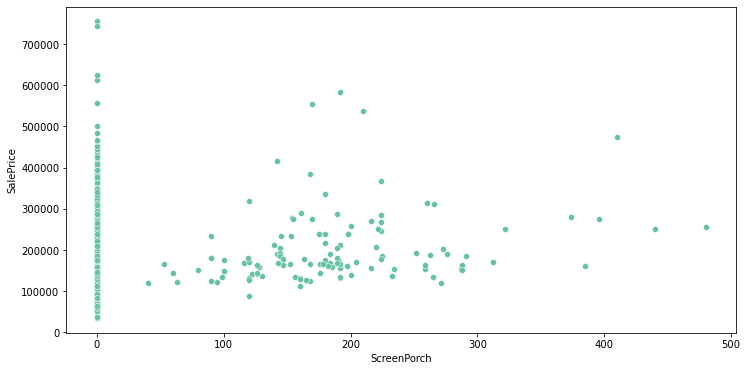

<Figure size 432x288 with 0 Axes>

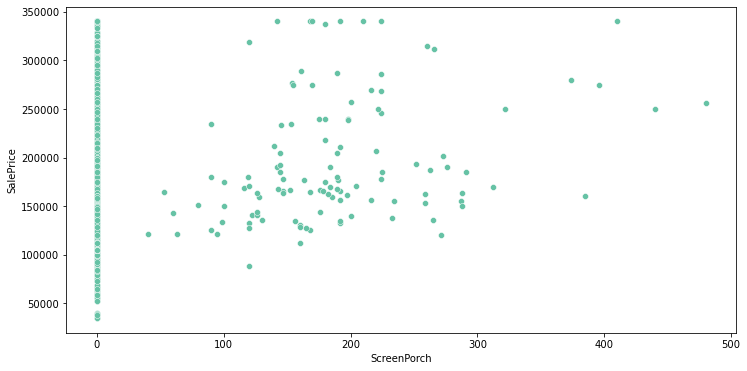

<Figure size 432x288 with 0 Axes>

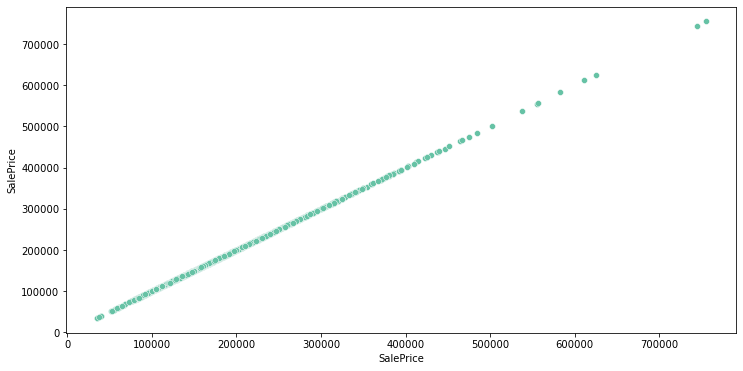

<Figure size 432x288 with 0 Axes>

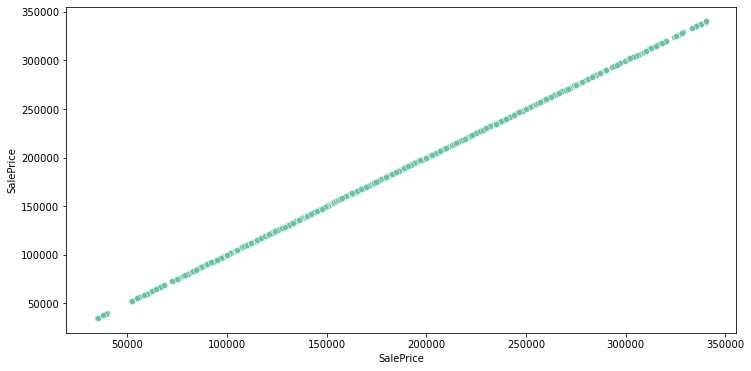

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

clr = "#c2c1f2"
pltt = "Set2"
sns.set_palette(pltt)
plt.rcParams.update({'figure.max_open_warning': 0})

def numRel(df, feature, label):
    plt.figure()
    f, ax = plt.subplots(figsize=(12, 6))
    fig = sns.scatterplot(data=df, y=label, x=feature, marker="o", palette=pltt)
    return;

for c in iqr_data.columns:
    numRel(imp_data, c, "SalePrice")
    numRel(iqr_data, c, "SalePrice")

### Qcut (QuantileDiscretizer)
Splits a continious numerical variable into n buckets, based on quantiles.

**Example:** Let's split SalePrice column into 6 buckets.

In [27]:
qcut_data = iqr_data.copy()
qcut_data["SalePrice_b"] = pd.qcut(qcut_data["SalePrice"], 6)
qcut_data["SalePrice_b_labels"] = pd.qcut(qcut_data["SalePrice"], 6, labels=[0, 1, 2, 3, 4, 5])

display(qcut_data[["SalePrice", "SalePrice_b", "SalePrice_b_labels"]])

SalePrice             SalePrice_b SalePrice_b_labels
Id                                                        
1      208500.0  (190000.0, 241416.667]                  4
2      181500.0    (163000.0, 190000.0]                  3
3      223500.0  (190000.0, 241416.667]                  4
4      140000.0    (139700.0, 163000.0]                  2
5      250000.0  (241416.667, 340037.5]                  5
...         ...                     ...                ...
1456   175000.0    (163000.0, 190000.0]                  3
1457   210000.0  (190000.0, 241416.667]                  4
1458   266500.0  (241416.667, 340037.5]                  5
1459   142125.0    (139700.0, 163000.0]                  2
1460   147500.0    (139700.0, 163000.0]                  2

[1460 rows x 3 columns]

### Distribution modification: Normalization

Normalization is a rescaling of the data so that all values are within range of 0 and 1.
A value is normalized as follows:

y = (x – min) / (max – min)


We can use **MinMaxScaler** to perform normalization 


In [28]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaled_data = iqr_data.copy()

pd.options.mode.chained_assignment = None 

scaler = MinMaxScaler()
scaler.fit(min_max_scaled_data)

min_max_scaled_data[min_max_scaled_data.columns] = scaler.transform(min_max_scaled_data)

display(min_max_scaled_data)

LotFrontage   LotArea  YearBuilt  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
Id                                                                           
1        0.440789  0.430367      0.944    0.477321    0.396490    0.000000   
2        0.638158  0.501390      0.728    0.000000    0.549245    0.000000   
3        0.480263  0.603292      0.928    0.394521    0.272938    0.000000   
4        0.375000  0.498302      0.240    0.000000    0.121306    0.000000   
5        0.690789  0.789186      0.920    0.852359    0.367848    0.000000   
...           ...       ...        ...         ...         ...         ...   
1456     0.401316  0.397449      0.912    0.000000    0.000000    0.000000   
1457     0.703947  0.722178      0.744    0.289802    0.443664    0.110583   
1458     0.453947  0.466928      0.448    0.000000    0.154440    0.000000   
1459     0.480263  0.508615      0.520    0.000000    0.027518    0.698100   
1460     0.572368  0.522202      0.640    0.000000    0.466128    0.196744   

      BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageYrBlt  \
Id                                                                         
1      0.088994     0.404975  0.286636  0.469231   0.570097     0.934272   
2      0.168496     0.606965  0.509575  0.000000   0.384484     0.680751   
3      0.257490     0.436816  0.321779  0.475824   0.601585     0.915493   
4      0.320380     0.355224  0.344293  0.415385   0.572997     0.887324   
5      0.290715     0.548756  0.445329  0.578571   0.772282     0.906103   
...         ...          ...       ...       ...        ...          ...   
1456   0.565411     0.453234  0.339900  0.381319   0.543995     0.896714   
1457   0.349451     0.746269  0.954904  0.000000   0.720493     0.699531   
1458   0.520320     0.552239  0.468941  0.632967   0.831115     0.352113   
1459   0.000000     0.515423  0.408539  0.000000   0.308250     0.436620   
1460   0.080688     0.603980  0.506280  0.000000   0.381998     0.577465   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  \
Id                                                                      
1       0.584066    0.000000     0.358824       0.000000          0.0   
2       0.490274    0.709524     0.000000       0.000000          0.0   
3       0.648015    0.000000     0.247059       0.000000          0.0   
4       0.684253    0.000000     0.205882       0.492754          0.0   
5       0.891021    0.457143     0.494118       0.000000          0.0   
...          ...         ...          ...            ...          ...   
1456    0.490274    0.000000     0.235294       0.000000          0.0   
1457    0.532907    0.830952     0.000000       0.000000          0.0   
1458    0.268585    0.000000     0.352941       0.000000          0.0   
1459    0.255795    0.871429     0.000000       0.202899          0.0   
1460    0.294165    1.000000     0.400000       0.000000          0.0   

      SalePrice  
Id               
1      0.568924  
2      0.480439  
3      0.618082  
4      0.344435  
5      0.704928  
...         ...  
1456   0.459137  
1457   0.573840  
1458   0.759002  
1459   0.351399  
1460   0.369014  

[1460 rows x 18 columns]

### Distribution modification: Standardization

Standardization is a rescaling of the data so that the distribution of observed values has mean equal to 0 and the standard deviation equal to 1.

A value is standardized as follows:

y = (x – mean) / standard_deviation

We can use **StandardScaler** to perform standardization 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaled_data = iqr_data.copy()

scaler = StandardScaler()
scaler.fit(scaled_data)

scaled_data[scaled_data.columns] = scaler.transform(scaled_data)

display(scaled_data)

Mean normalization

In [ ]:
norm_data=(iqr_data-iqr_data.mean()/iqr_data.std())
norm_data

<Figure size 432x288 with 0 Axes>

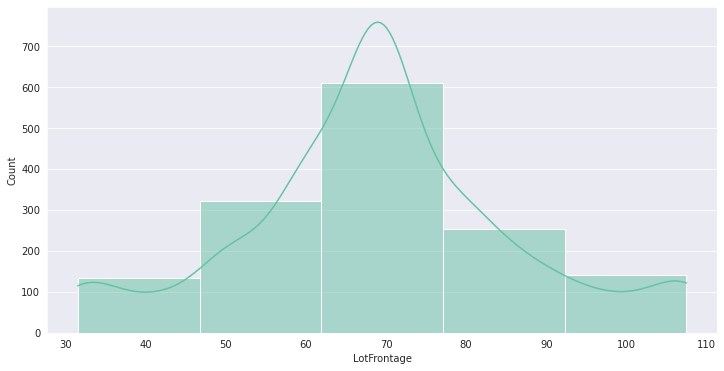

<Figure size 432x288 with 0 Axes>

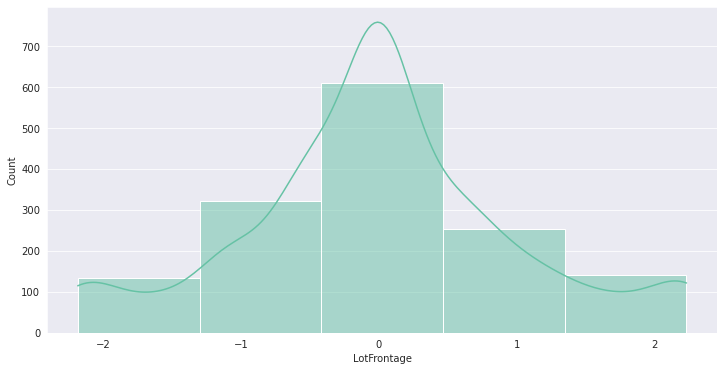

<Figure size 432x288 with 0 Axes>

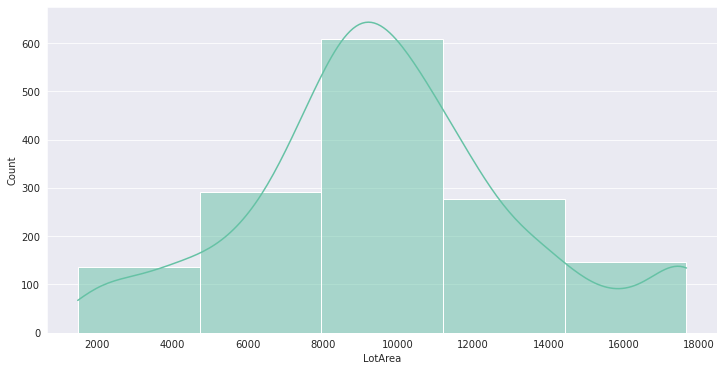

<Figure size 432x288 with 0 Axes>

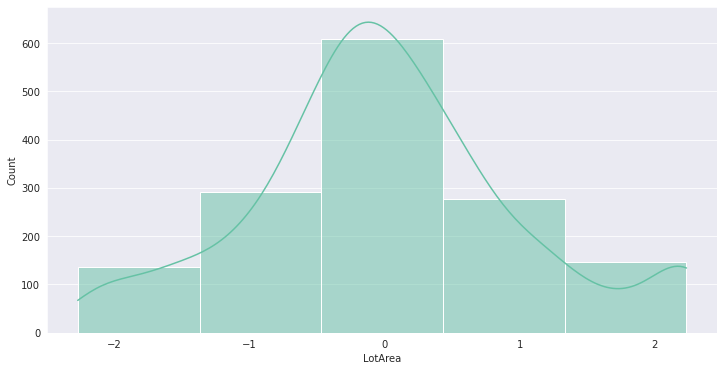

<Figure size 432x288 with 0 Axes>

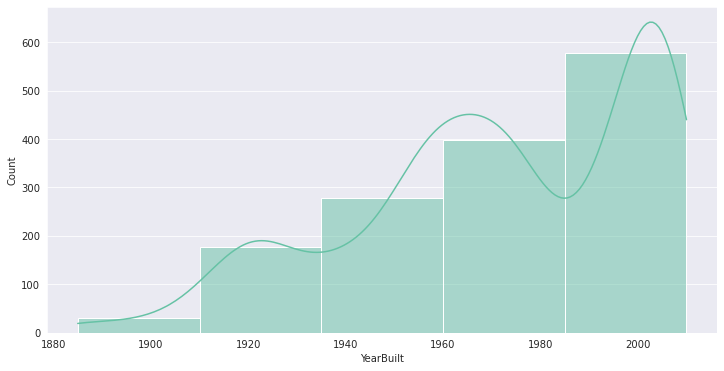

<Figure size 432x288 with 0 Axes>

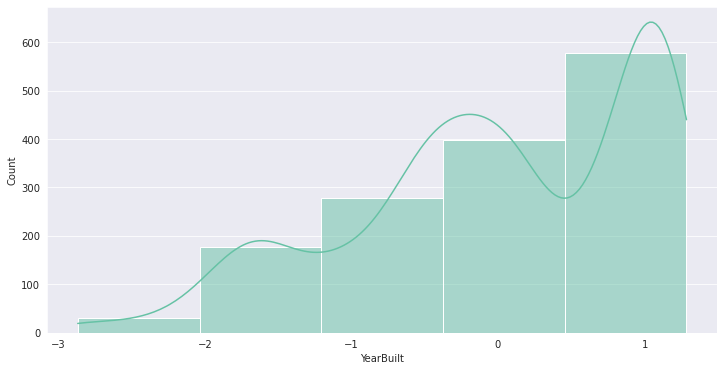

<Figure size 432x288 with 0 Axes>

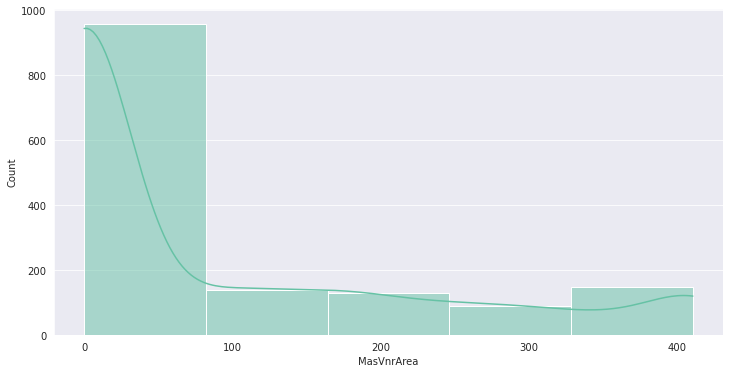

<Figure size 432x288 with 0 Axes>

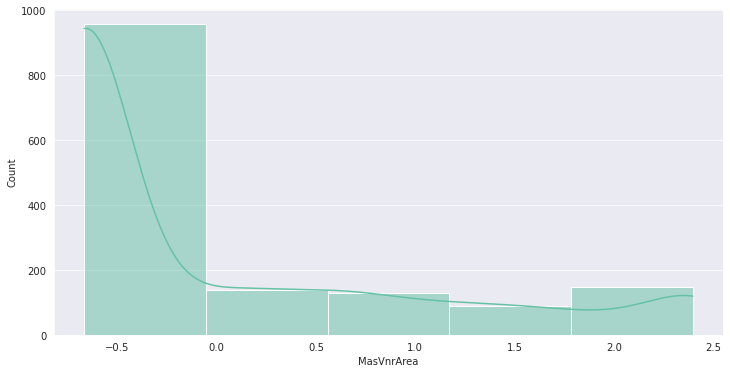

<Figure size 432x288 with 0 Axes>

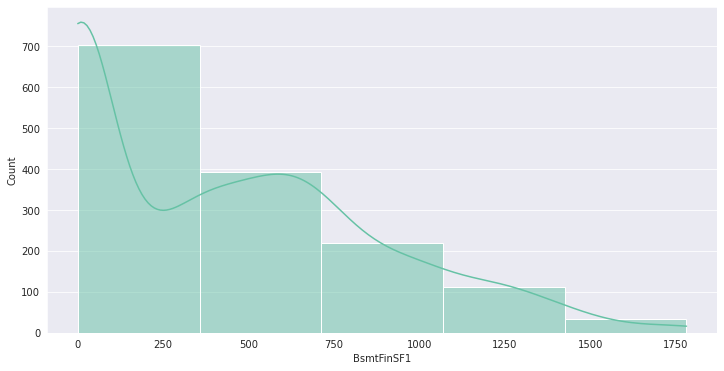

<Figure size 432x288 with 0 Axes>

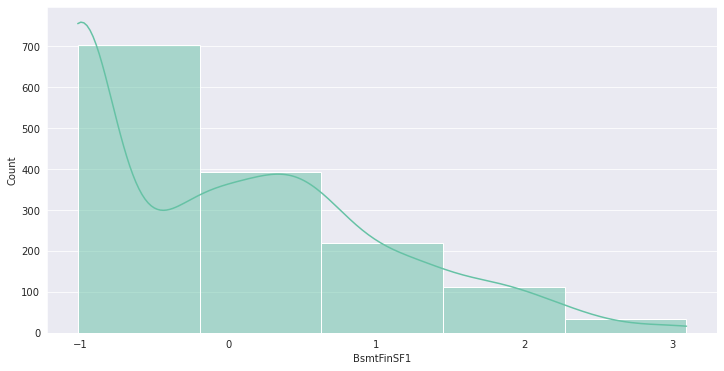

<Figure size 432x288 with 0 Axes>

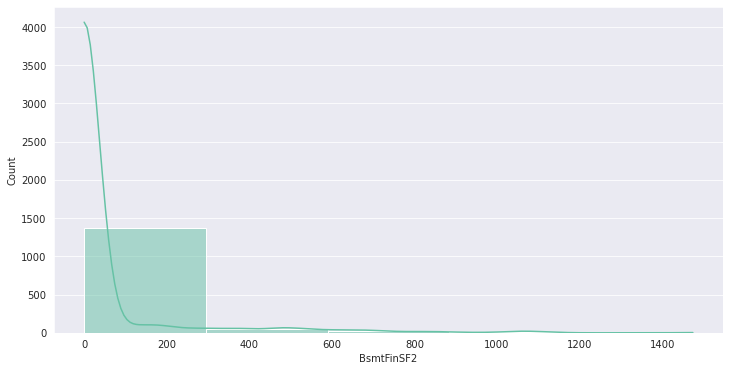

<Figure size 432x288 with 0 Axes>

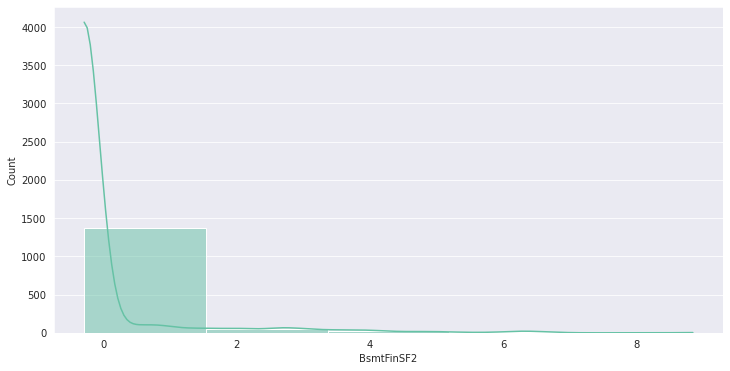

<Figure size 432x288 with 0 Axes>

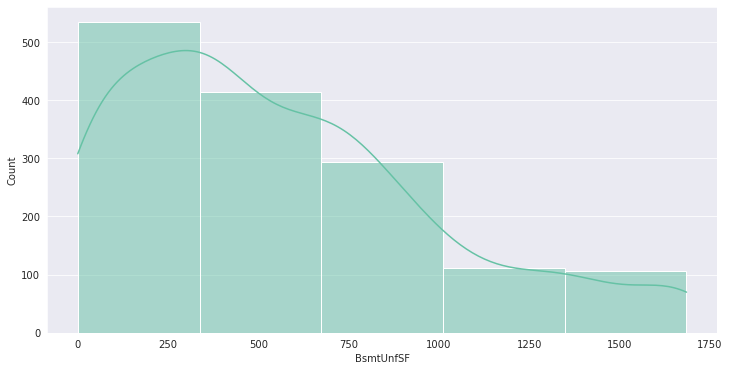

<Figure size 432x288 with 0 Axes>

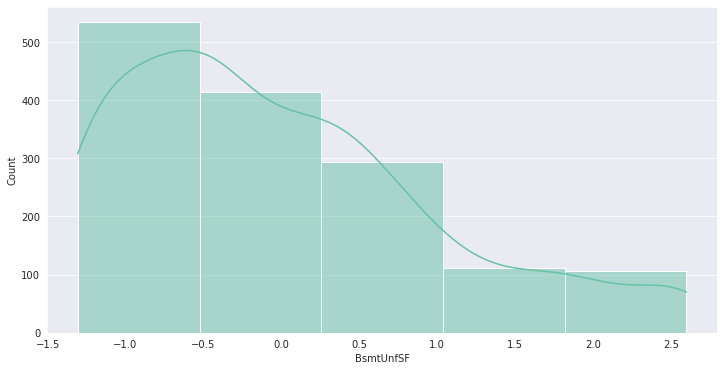

<Figure size 432x288 with 0 Axes>

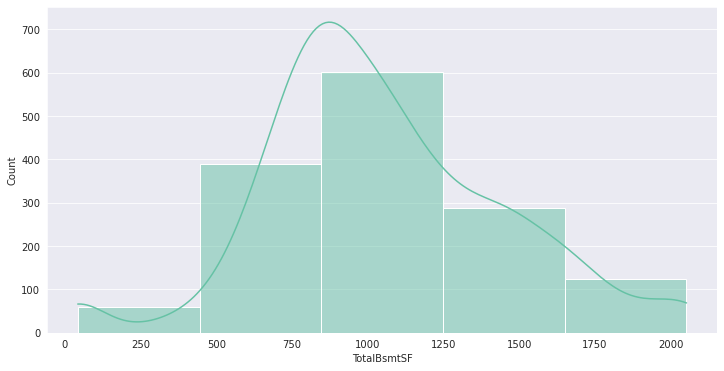

<Figure size 432x288 with 0 Axes>

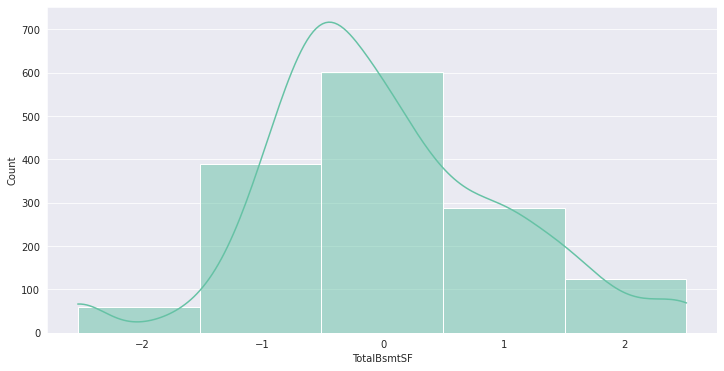

<Figure size 432x288 with 0 Axes>

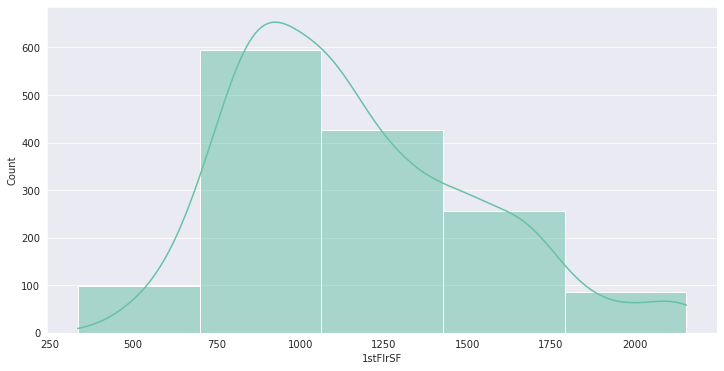

<Figure size 432x288 with 0 Axes>

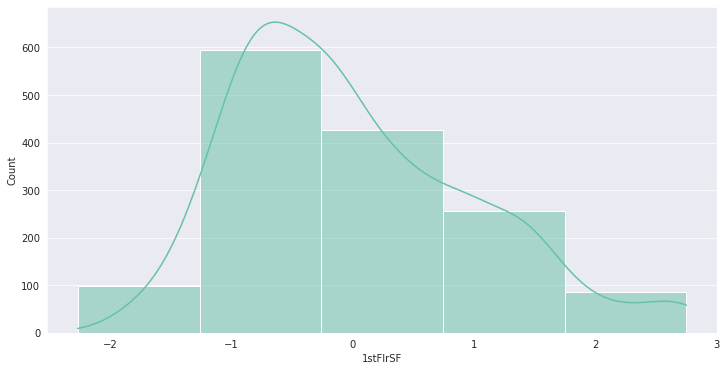

<Figure size 432x288 with 0 Axes>

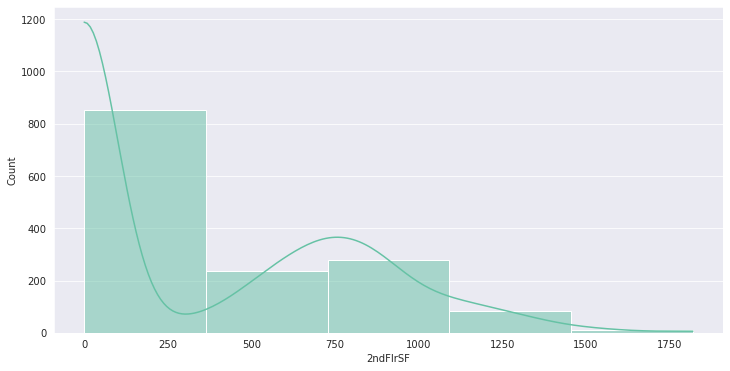

<Figure size 432x288 with 0 Axes>

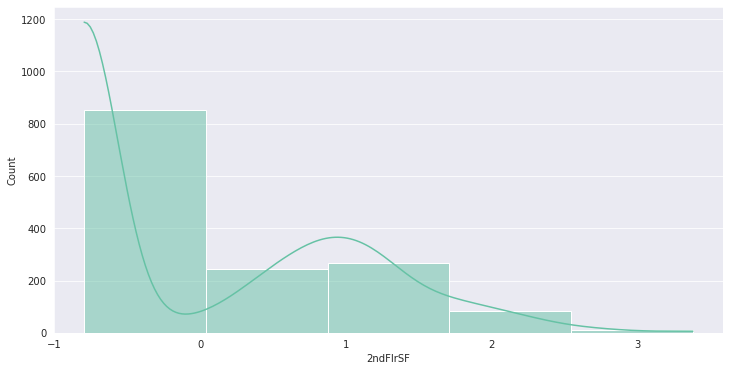

<Figure size 432x288 with 0 Axes>

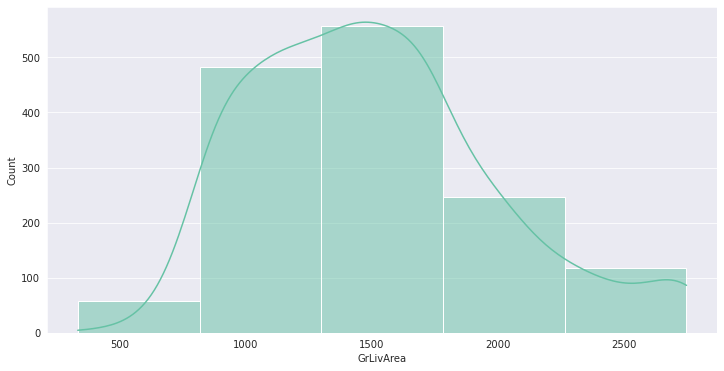

<Figure size 432x288 with 0 Axes>

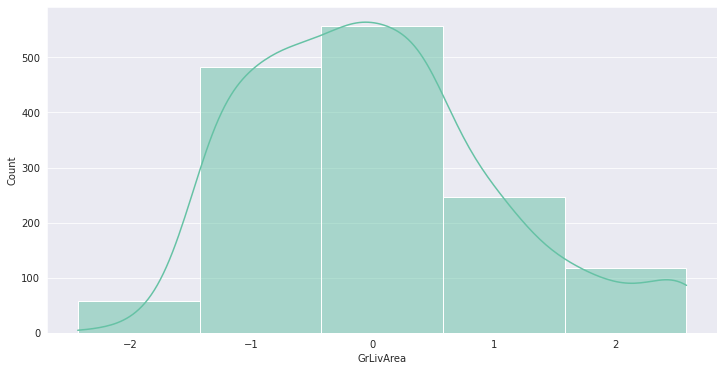

<Figure size 432x288 with 0 Axes>

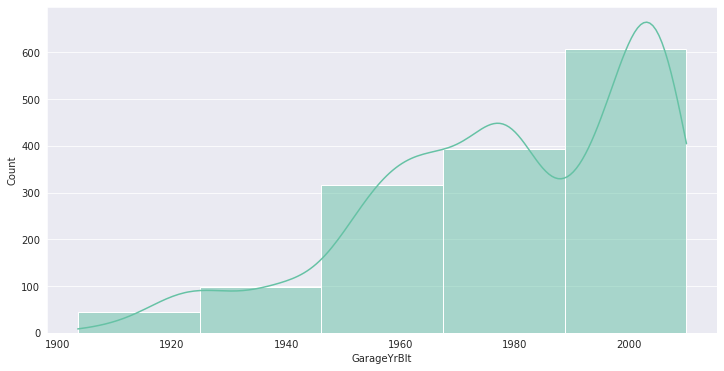

<Figure size 432x288 with 0 Axes>

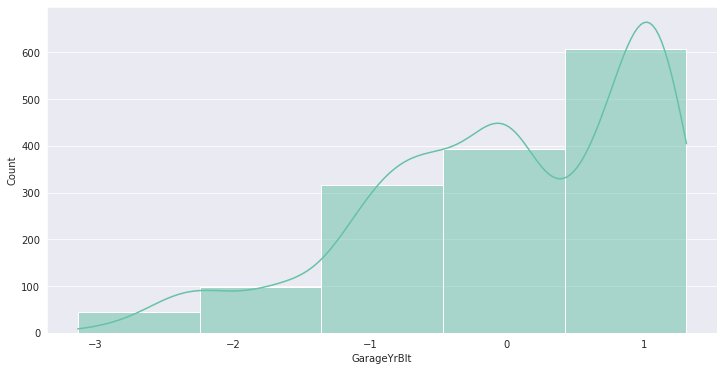

<Figure size 432x288 with 0 Axes>

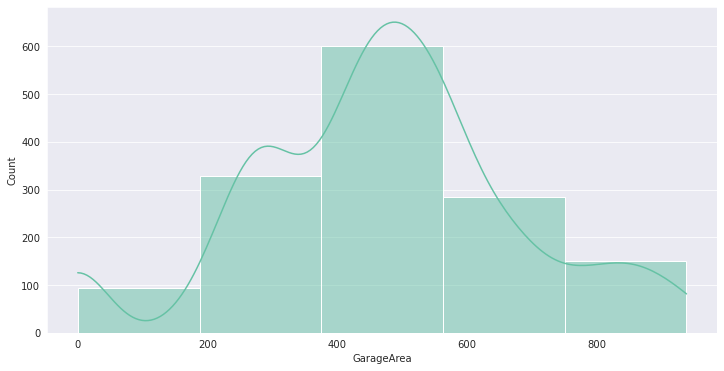

<Figure size 432x288 with 0 Axes>

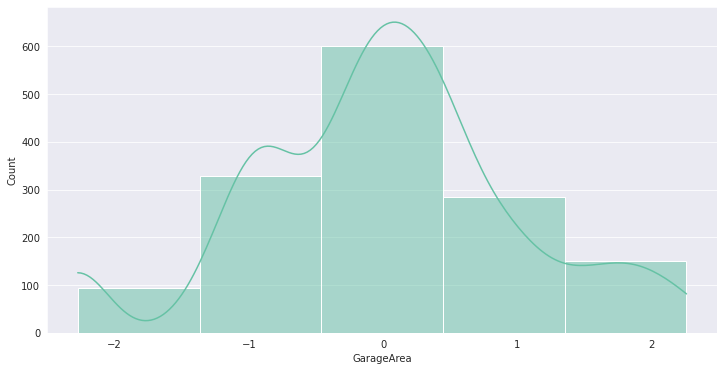

<Figure size 432x288 with 0 Axes>

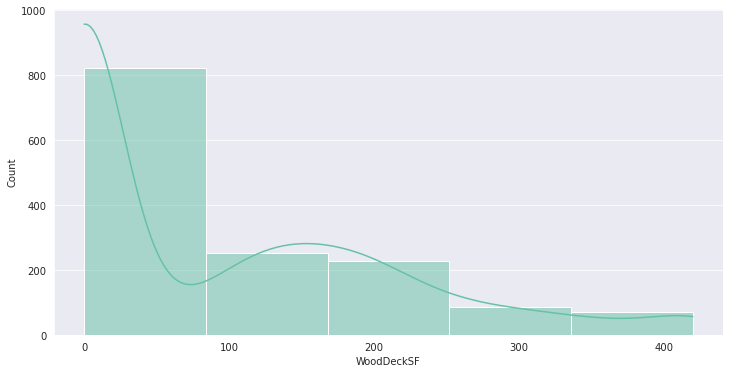

<Figure size 432x288 with 0 Axes>

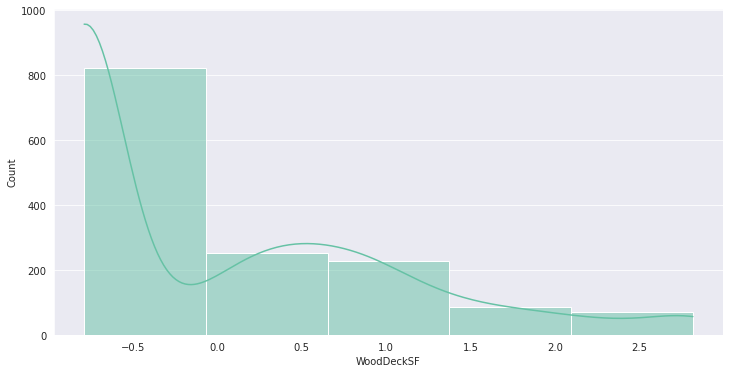

<Figure size 432x288 with 0 Axes>

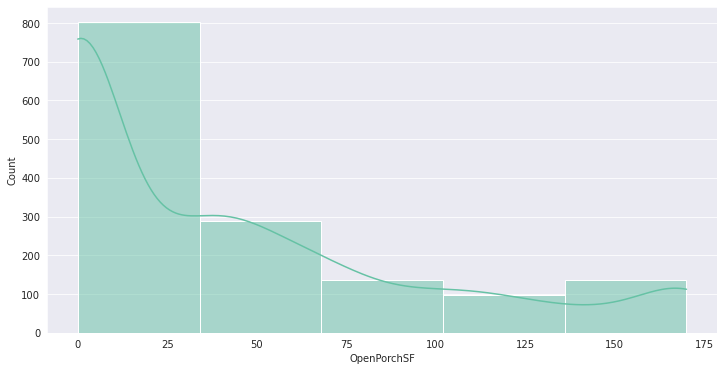

<Figure size 432x288 with 0 Axes>

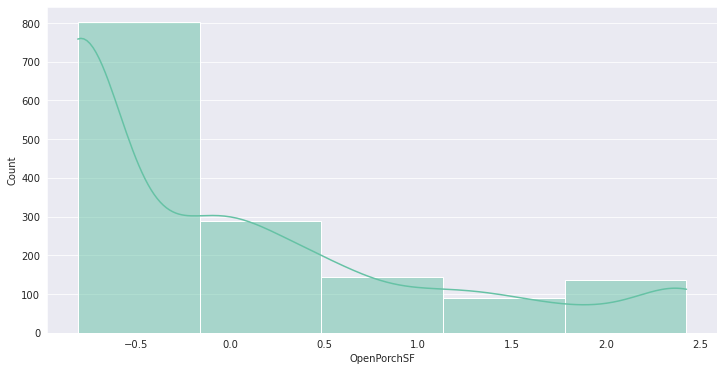

<Figure size 432x288 with 0 Axes>

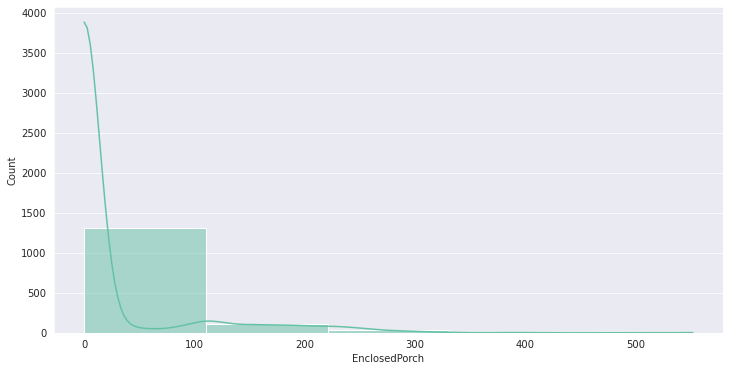

<Figure size 432x288 with 0 Axes>

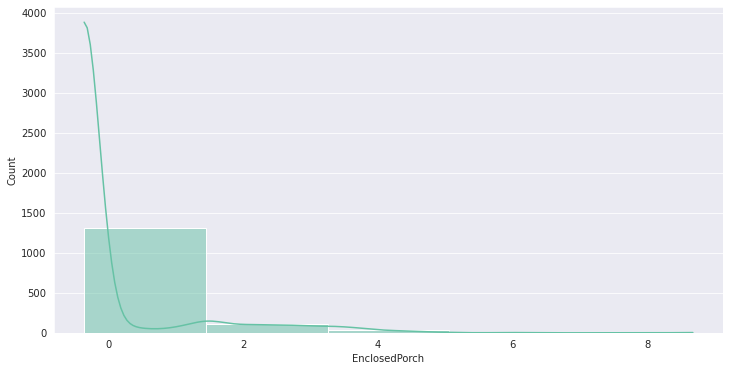

<Figure size 432x288 with 0 Axes>

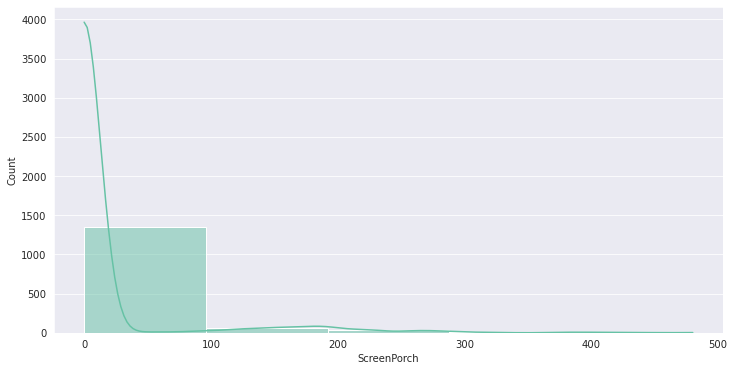

<Figure size 432x288 with 0 Axes>

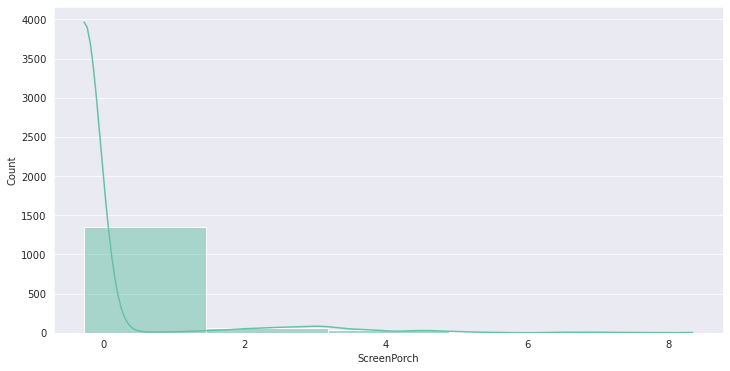

<Figure size 432x288 with 0 Axes>

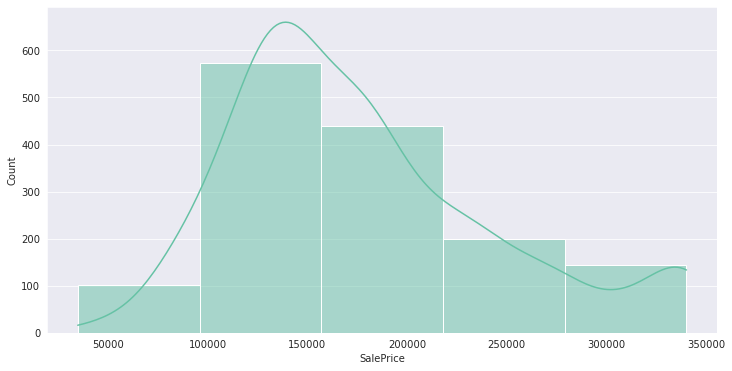

<Figure size 432x288 with 0 Axes>

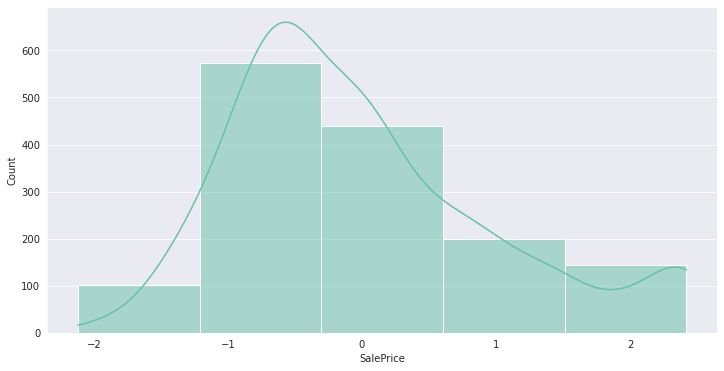

In [31]:
def histogram(x, bins):
  plt.figure()
  sns.set_style("darkgrid")
  f, ax = plt.subplots(figsize=(12, 6))
  sns.histplot(x, bins = bins, kde = True )
  plt.grid(axis = 'x')
  return;

for c in scaled_data: 
    histogram(iqr_data[c].dropna(), 5)
    histogram(scaled_data[c].dropna(), 5)


### Derived attributes: Differences and rates
Example of Differences: "Actual Loan Balance" = "Total Loan Balance" - "Paid Installments" 


In [32]:
date_data = num_data[date_features].fillna(0).copy()

for c in date_data:
    max_val = date_data[c].max()
    print("max for {c} is : {v}".format(c=c, v=max_val))
    date_data[c] = max_val - date_data[c]
    
has_garage_threshold = 120
date_data['GarageYrBlt'] = np.where(date_data['GarageYrBlt'] >= has_garage_threshold, np.nan, date_data['GarageYrBlt']).astype(float)
date_data['HasGarage'] = np.where(date_data['GarageYrBlt'].isnull(), False, True)

max for YearBuilt is : 2010.0
max for GarageYrBlt is : 2010.0


### Binning

Transformation from numeric variables to categorical

In [33]:
bin_labels_5 = ['Newest', 'New', 'Mid', 'Old', 'Oldest']
date_data['YearBuilt_b'] = pd.qcut(date_data['YearBuilt'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)
date_data['GarageYrBlt_b'] = pd.qcut(date_data['GarageYrBlt'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)
display(date_data[date_data['HasGarage'] == True].head(3))
display(date_data[date_data['HasGarage'] == False].head(3))

YearBuilt  GarageYrBlt  HasGarage YearBuilt_b GarageYrBlt_b
Id                                                             
1         7.0          7.0       True      Newest           New
2        34.0         34.0       True         Mid           Mid
3         9.0          9.0       True         New           New

YearBuilt  GarageYrBlt  HasGarage YearBuilt_b GarageYrBlt_b
Id                                                             
40       55.0          NaN      False         Old           NaN
49       90.0          NaN      False      Oldest           NaN
79       42.0          NaN      False         Mid           NaN

## <font color='red'> Transformation of Categorical Features </font>

Categorical data must be converted to numerical form. There is several approaches how to do that. 

### Variables description - House prices analysis example 
    
**MSSubClass**:
    _Identifies the type of dwelling involved in the sale._
  - **20**: _1-STORY 1946 & NEWER ALL STYLES_
  - **30**: _1-STORY 1945 & OLDER_
  - **40**: _1-STORY W/FINISHED ATTIC ALL AGES_
  - **45**: _1-1/2 STORY - UNFINISHED ALL AGES_
  - **50**: _1-1/2 STORY FINISHED ALL AGES_
  - **60**: _2-STORY 1946 & NEWER_
  - **70**: _2-STORY 1945 & OLDER_
  - **75**: _2-1/2 STORY ALL AGES_
  - **80**: _SPLIT OR MULTI-LEVEL_
  - **85**: _SPLIT FOYER_
  - **90**: _DUPLEX - ALL STYLES AND AGES_
  - **120**: _1-STORY PUD (Planned Unit Development) - 1946 & NEWER_
  - **150**: _1-1/2 STORY PUD - ALL AGES_
  - **160**: _2-STORY PUD - 1946 & NEWER_
  - **180**: _PUD - MULTILEVEL - INCL SPLIT LEV/FOYER_
  - **190**: _2 FAMILY CONVERSION - ALL STYLES AND AGES_
       
**OverallQual**:
    _Rates the overall material and finish of the house_
    
**OverallCond**:
    _Rates the overall condition of the house_
  - **10**: _Very Excellent_
  - **9**: 	_Excellent_
  - **8**: 	_Very Good_
  - **7**: 	_Good_
  - **6**: 	_Above Average_
  - **5**: 	_Average_
  - **4**: 	_Below Average_
  - **3**: 	_Fair_
  - **2**: 	_Poor_
  - **1**: 	_Very Poor_
  
**MSZoning**:
	_Identifies the general zoning classification of the sale._
  - **A**: 	_Agriculture_
  - **C**: 	_Commercial_
  - **FV**: 	_Floating Village Residential_
  - **I**: 	_Industrial_
  - **RH**: 	_Residential High Density_
  - **RL**: 	_Residential Low Density_
  - **RP**: 	_Residential Low Density Park_
  - **RM**: 	_Residential Medium Density_
	   
**HouseStyle**:
	_Style of dwelling_
  - **1Story**: 	_One story_
  - **1.5Fin**: 	_One and one-half story: 2nd level finished_
  - **1.5Unf**: 	_One and one-half story: 2nd level unfinished_
  - **2Story**: 	_Two story_
  - **2.5Fin**: 	_Two and one-half story: 2nd level finished_
  - **2.5Unf**: 	_Two and one-half story: 2nd level unfinished_
  - **SFoyer**: 	_Split Foyer_
  - **SLvl**: 	_Split Level_
       
**ExterQual**:
	_Evaluates the quality of the material on the exterior_
  - **Ex:** 	_Excellent_
  - **Gd:** 	_Good_
  - **TA:** 	_Average/Typical_
  - **Fa:** 	_Fair_
  - **Po:** 	_Poor_
       
**Foundation**:
	_Type of foundation_
  - **BrkTil**: 	_Brick & Tile_
  - **Cblock**: 	_Cinder Block_
  - **Pconc**: 	_Poured Contrete_	
  - **Slab**: 	_Slab_
  - **Stone**: 	_Stone_
  - **Wood**: 	_Wood_
       
**BsmtQual**:
	_Evaluates the height of the basement_
  - **Ex**	_Excellent (100+ inches)_
  - **Gd**	_Good (90-99 inches)_
  - **TA**	_Typical (80-89 inches)_
  - **Fa**	_Fair (70-79 inches)_
  - **Po**	_Poor (<70 inches_
  - **NA**	_No Basement_

**BsmtCond**:
	_Evaluates the general condition of the basement_
  - **Ex:** _Excellent_
  - **Gd:** _Good_
  - **TA:** _Typical - slight dampness allowed_
  - **Fa:** _Fair - dampness or some cracking or settling_
  - **Po:** _Poor - Severe cracking, settling, or wetness_
  - **NA:** _No Basement_
       
**HeatingQC**:
	_Heating quality and condition_
  - **Ex:** _Excellent_
  - **Gd:** _Good_
  - **TA:** _Average/Typical_
  - **Fa:** _Fair_
  - **Po:** _Poor_
       
**CentralAir**:
	_Central air conditioning_
  - **N**: 	_No_
  - **Y**: 	_Yes_

**KitchenQual**:
	_Kitchen quality_
  - **Ex**: _Excellent_
  - **Gd**: _Good_
  - **TA**: _Typical/Average_
  - **Fa**: _Fair_
  - **Po**: _Poor_
       
**GarageQual**:
	_Garage quality_
  - **Ex**: _Excellent_
  - **Gd**: _Good_
  - **TA**: _Typical/Average_
  - **Fa**: _Fair_
  - **Po**: _Poor_
  - **NA**: _No Garage_
       
**PoolQC**:
	_Pool quality_
  - **Ex**: _Excellent_
  - **Gd**: _Good_
  - **TA**: _Average/Typical_
  - **Fa**: _Fair_
  - **NA**: _No Pool_


### LabelEncoder

LabelEncoder is for encoding target variable. It numbers the different categories from 0 to n-1. LabelEncoder can only fit data of shape (n_samples) and cannot handle missing values.

Example only:

In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_le = cat_data[['KitchenQual']]
df_le['C_KitchenQual'] = le.fit_transform(cat_data['KitchenQual'])
df_le.value_counts()

KitchenQual  C_KitchenQual
TA           3                735
Gd           2                586
Ex           0                100
Fa           1                 39
dtype: int64

For strings the labels are sorted alphabetically and the lowest integer value is assigned to first string in alphabetical order. Therefore encoding is assigned as followed:

**Ex** = 0

**Fa** = 1

**Gd** = 2 

**TA** = 3

### OrdinalEncoder

OrdinalEncoder is for encoding features and has same functionality as LabelEncoder. The difference is that it can fit data of shape (n_samples, n_features).

Example only:

In [37]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

transformed_data = oe.fit_transform(cat_data[['KitchenQual', 'MSSubClass']])

df_oe = pd.DataFrame(transformed_data, columns = ['C_KitchenQual', 'C_MSSubClass'])
df_oe[['KitchenQual', 'MSSubClass']] = cat_data[['KitchenQual', 'MSSubClass']]
display(df_oe[['KitchenQual', 'C_KitchenQual', 'MSSubClass', 'C_MSSubClass']])

KitchenQual  C_KitchenQual MSSubClass  C_MSSubClass
0            NaN            2.0        NaN           9.0
1             Gd            3.0         60           4.0
2             TA            2.0         20           9.0
3             Gd            2.0         60          10.0
4             Gd            2.0         70           9.0
...          ...            ...        ...           ...
1455          Gd            3.0         20           9.0
1456          TA            3.0         60           4.0
1457          TA            2.0         20          10.0
1458          Gd            2.0         70           4.0
1459          Gd            3.0         20           4.0

[1460 rows x 4 columns]

### Text Replace 

Categorical values can be also manually replaced with custom values. It is usefull for ordinal variables with natural ordered relationship between each other. In our example the best kitchen quality hasis assigned to the highest value.

Example only:

In [38]:
mapping = {'Ex': 4,
           'Gd': 3,
           'TA': 2,
           'Fa': 1,
           'Po': 0
          }

cat_data['KitchenQual_mapping'] = cat_data.KitchenQual.map(mapping)

display(cat_data[['KitchenQual','KitchenQual_mapping']])

KitchenQual  KitchenQual_mapping
Id                                   
1             Gd                    3
2             TA                    2
3             Gd                    3
4             Gd                    3
5             Gd                    3
...          ...                  ...
1456          TA                    2
1457          TA                    2
1458          Gd                    3
1459          Gd                    3
1460          TA                    2

[1460 rows x 2 columns]

###  One-Hot encoding

  - One-hot encoding is an extremely common data transformation performed after indexing categorical variables. This is because indexing does not always represent our categorical variables in the correct way for downstream models to process. For instance, when we index our “color” column, you will notice that some colors have a higher value (or index number) than others (in our case, blue is 1 and green is 2).
  - This is incorrect because it gives the mathematical appearance that the input to the machine learning algorithm seems to specify that green > blue, which makes no sense in the case of the current categories. To avoid this, we use OneHotEncoder, which will convert each distinct value to a Boolean flag (1 or 0) as a component in a vector. When we encode the color value, then we can see these are no longer ordered, making them easier for downstream models (e.g., a linear model) to process
  - Input column must be of type NumericType
  


Pandas get_dummies() converts categorical variables into dummy variables

In [39]:
oh_data = cat_data.copy()
oh_data = pd.get_dummies(oh_data, columns=oh_data.columns.tolist(), prefix = oh_data.columns.tolist())

display(oh_data.head())

MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
Id                                                                   
1                0               0               0               0   
2                0               0               0               0   
3                0               0               0               0   
4                0               0               0               0   
5                0               0               0               0   

    MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
Id                                                                              
1               0              0              0              0              0   
2               1              0              0              0              0   
3               0              0              0              0              0   
4               0              0              0              0              0   
5               0              0              0              0              0   

    MSSubClass_60  ...  PriceNtile_4  PriceNtile_5  PriceNtile_6  \
Id                 ...                                             
1               1  ...             0             0             0   
2               0  ...             0             0             1   
3               1  ...             0             0             0   
4               0  ...             0             0             0   
5               1  ...             0             0             0   

    PriceNtile_7  PriceNtile_8  PriceNtile_9  KitchenQual_mapping_1  \
Id                                                                    
1              1             0             0                      0   
2              0             0             0                      0   
3              1             0             0                      0   
4              0             0             0                      0   
5              0             1             0                      0   

    KitchenQual_mapping_2  KitchenQual_mapping_3  KitchenQual_mapping_4  
Id                                                                       
1                       0                      1                      0  
2                       1                      0                      0  
3                       0                      1                      0  
4                       0                      1                      0  
5                       0                      1                      0  

[5 rows x 521 columns]

OneHotEncoder also encodes categorical variables as a one-hot numeric array

In [40]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')

transformed_data = ohe.fit_transform(cat_data[['KitchenQual']]).toarray()
column_name = ohe.get_feature_names(['KitchenQual'])

enc_df = pd.DataFrame(transformed_data, columns=column_name)
df_ohe = cat_data.join(enc_df)
display(df_ohe)

MSSubClass MSZoning Street LotShape LandContour Utilities LotConfig  \
Id                                                                         
1            60       RL   Pave      Reg         Lvl    AllPub    Inside   
2            20       RL   Pave      Reg         Lvl    AllPub       FR2   
3            60       RL   Pave      IR1         Lvl    AllPub    Inside   
4            70       RL   Pave      IR1         Lvl    AllPub    Corner   
5            60       RL   Pave      IR1         Lvl    AllPub       FR2   
...         ...      ...    ...      ...         ...       ...       ...   
1456         60       RL   Pave      Reg         Lvl    AllPub    Inside   
1457         20       RL   Pave      Reg         Lvl    AllPub    Inside   
1458         70       RL   Pave      Reg         Lvl    AllPub    Inside   
1459         20       RL   Pave      Reg         Lvl    AllPub    Inside   
1460         20       RL   Pave      Reg         Lvl    AllPub    Inside   

     LandSlope Neighborhood Condition1  ... YrSold SaleType SaleCondition  \
Id                                      ...                                 
1          Gtl      CollgCr       Norm  ...   2008       WD        Normal   
2          Gtl      Veenker      Feedr  ...   2007       WD        Normal   
3          Gtl      CollgCr       Norm  ...   2008       WD        Normal   
4          Gtl      Crawfor       Norm  ...   2006       WD       Abnorml   
5          Gtl      NoRidge       Norm  ...   2008       WD        Normal   
...        ...          ...        ...  ...    ...      ...           ...   
1456       Gtl      Gilbert       Norm  ...   2007       WD        Normal   
1457       Gtl       NWAmes       Norm  ...   2010       WD        Normal   
1458       Gtl      Crawfor       Norm  ...   2010       WD        Normal   
1459       Gtl        NAmes       Norm  ...   2010       WD        Normal   
1460       Gtl      Edwards       Norm  ...   2008       WD        Normal   

     Neighbourhood_Rank PriceNtile KitchenQual_mapping KitchenQual_Ex  \
Id                                                                      
1                    17          7                   3            0.0   
2                    21          6                   2            0.0   
3                    17          7                   3            0.0   
4                    18          3                   3            0.0   
5                    25          8                   3            0.0   
...                 ...        ...                 ...            ...   
1456                 15          5                   2            0.0   
1457                 14          7                   2            0.0   
1458                 18          8                   3            0.0   
1459                 11          3                   3            0.0   
1460                  5          4                   2            NaN   

     KitchenQual_Fa KitchenQual_Gd KitchenQual_TA  
Id                                                 
1               0.0            0.0            1.0  
2               0.0            1.0            0.0  
3               0.0            1.0            0.0  
4               0.0            1.0            0.0  
5               0.0            0.0            1.0  
...             ...            ...            ...  
1456            0.0            0.0            1.0  
1457            0.0            1.0            0.0  
1458            0.0            1.0            0.0  
1459            0.0            0.0            1.0  
1460            NaN            NaN            NaN  

[1460 rows x 65 columns]

### List of Pandas string methods
Notice that these have various return values. Some, like lower(), return a series of strings. 

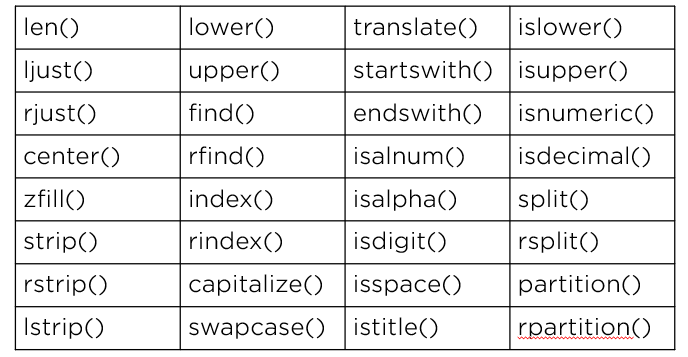

## <font color='red'>  Relationship between variables </font>


### Relationship between numeric variables >> Correlation coefficents

<AxesSubplot:>

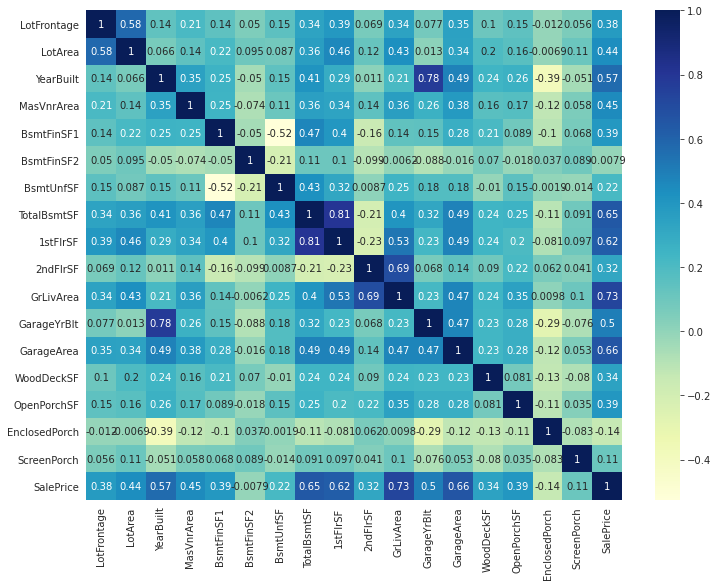

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = scaled_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cmap="YlGnBu", annot=True)

# Putting it all together

Creating a full datamart that contains all attributes - both categorical and numerical as processed.

In [ ]:
full_data = pd.merge(oh_data, scaled_data.drop('SalePrice', axis=1), how='inner', left_index=True, right_index=True)
full_data = pd.merge(full_data, data[['SalePrice']], how='inner', left_index=True, right_index=True).rename({'SalePrice': 'label'})
display(full_data)

In [ ]:
full_data.to_excel('./data/full_data.xlsx')